In [ ]:
!pip install mlrose
import mlrose
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import time


np.random.seed(7641)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## N-queens

In [ ]:
#number of queens

numberQs = list(range(4,62,2))
exp_c = [0.001, 0.005, 0.01,  0.05, 0.075]

In [ ]:
#Simulated Annealing
#best_fit_arr

def simulA(expc, numberQs):
  total = []
  for c in exp_c:
    scores = []
    for q in numberQs:
      print(c,q)
      problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
      # Define initial state
      init_state = np.ones(q)
      # Define decay schedule
      schedule = mlrose.ExpDecay(exp_const= c)
      # Solve problem using simulated annealing

      best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
                                                            max_attempts = 700, max_iters = 10000, random_state = 7641)
      itemindex = np.where(curve_fit==- best_fitness)

      scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = simulA(exp_c, numberQs)

0.001 4
0.001 6
0.001 8
0.001 10
0.001 12
0.001 14
0.001 16
0.001 18
0.001 20
0.001 22
0.001 24
0.001 26
0.001 28
0.001 30
0.001 32


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


0.001 34
0.001 36
0.001 38
0.001 40
0.001 42
0.001 44
0.001 46
0.001 48
0.001 50
0.001 52
0.001 54
0.001 56
0.001 58
0.001 60
0.005 4
0.005 6
0.005 8
0.005 10
0.005 12
0.005 14
0.005 16
0.005 18
0.005 20
0.005 22
0.005 24
0.005 26
0.005 28
0.005 30
0.005 32
0.005 34
0.005 36
0.005 38
0.005 40
0.005 42
0.005 44
0.005 46
0.005 48
0.005 50
0.005 52
0.005 54
0.005 56
0.005 58
0.005 60
0.01 4
0.01 6
0.01 8
0.01 10
0.01 12
0.01 14
0.01 16
0.01 18
0.01 20
0.01 22
0.01 24
0.01 26
0.01 28
0.01 30
0.01 32
0.01 34
0.01 36
0.01 38
0.01 40
0.01 42
0.01 44
0.01 46
0.01 48
0.01 50
0.01 52
0.01 54
0.01 56
0.01 58
0.01 60
0.05 4
0.05 6
0.05 8
0.05 10
0.05 12
0.05 14
0.05 16
0.05 18
0.05 20
0.05 22
0.05 24
0.05 26
0.05 28
0.05 30
0.05 32
0.05 34
0.05 36
0.05 38
0.05 40
0.05 42
0.05 44
0.05 46
0.05 48
0.05 50
0.05 52
0.05 54
0.05 56
0.05 58
0.05 60
0.075 4
0.075 6
0.075 8
0.075 10
0.075 12
0.075 14
0.075 16
0.075 18
0.075 20
0.075 22
0.075 24
0.075 26
0.075 28
0.075 30
0.075 32
0.075 34
0.075 36
0.075 38

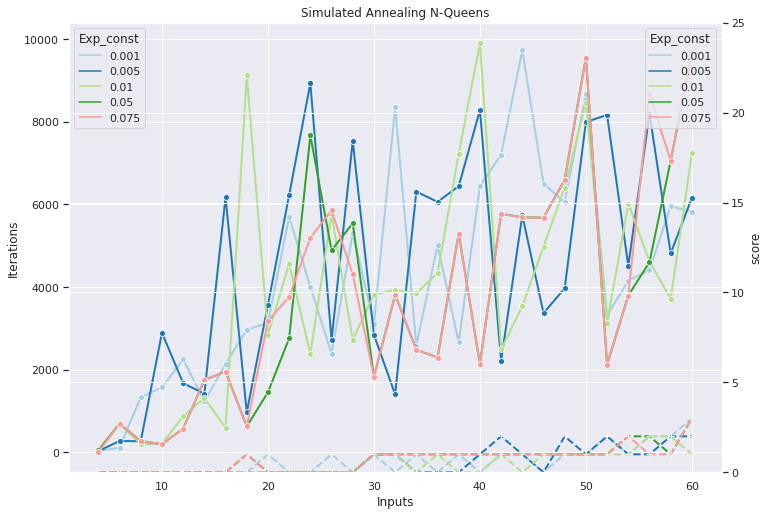

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "Exp_const"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "Exp_const"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="Iterations",  hue = "Exp_const",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "Inputs", y = "score" , hue = "Exp_const", ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 25)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Simulated Annealing N-Queens")
plt.show()


In [ ]:
data.to_csv("n-q_sa.csv")
# optimal decay is 0.01

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000,1200]

In [ ]:
q = 40
problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)


In [ ]:
def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt )    

/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


100
200
300
400
500
600
700
1000
1200


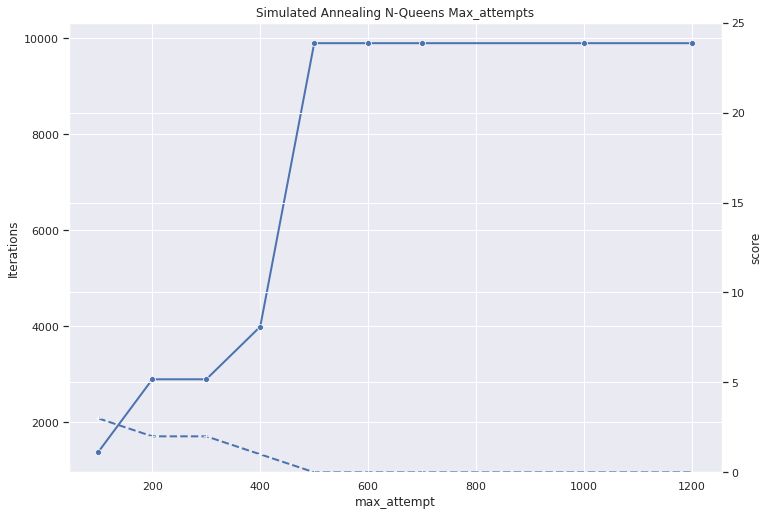

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="max_attempt", y="Iterations",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "max_attempt", y = "score" , ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 25)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Simulated Annealing N-Queens Max_attempts")
plt.show()

In [ ]:
exp_c = [0.001, 0.005, 0.01,  0.05, 0.075]

In [ ]:
exp_c = [0.001, 0.005, 0.01,  0.05, 0.075]
def tuneC(expc, numberQs):
  total = []
  for c in exp_c:
    scores = []
    q = 40
    print(c,q)
    problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
    # Define initial state
    init_state = np.ones(q)
    # Define decay schedule
    schedule = mlrose.ExpDecay(exp_const= c)
    # Solve problem using simulated annealing

    best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
                                                          max_attempts = 600,  random_state = 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = tuneC(exp_c, numberQs)

0.001 40
0.005 40


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


0.01 40
0.05 40
0.075 40


In [ ]:
total

[[(40, 6447, 0.0, 7048, 0.001)],
 [(40, 10359, 0.0, 10960, 0.005)],
 [(40, 9902, 0.0, 10503, 0.01)],
 [(40, 2137, 1.0, 6772, 0.05)],
 [(40, 2137, 1.0, 6772, 0.075)]]

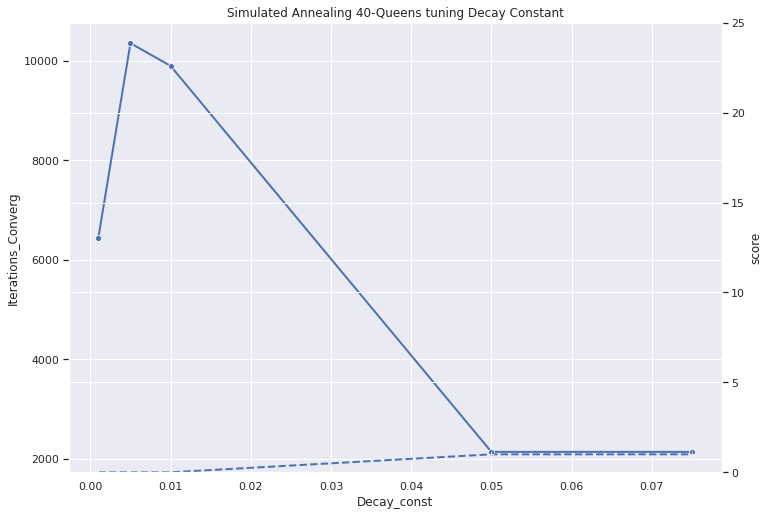

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations_Converg", "score", "totalsize", "Decay_const"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations_Converg", "score", "totalsize", "Decay_const"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data


data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Decay_const", y="Iterations_Converg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "Decay_const", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 25)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Simulated Annealing 40-Queens tuning Decay Constant")
plt.show()

In [ ]:
# def simulA(numberQs):
#   total = []
#   scores = []
#   for q in numberQs:
#     print(q)
#     problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
#     # Define initial state
#     init_state = np.ones(q)
#     # Define decay schedule
#     schedule = mlrose.ExpDecay(exp_const= 0.01)
#     # Solve problem using simulated annealing

#     best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
#                                                           max_attempts = 700, max_iters = 10000, random_state = 7641)
#     itemindex = np.where(curve_fit==- best_fitness)

#     scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,0.01))
#   total.append(scores)
#   return total

# total = simulA(numberQs)

In [ ]:
# data = stackExperiments(total)

# sn.set(rc={'figure.figsize':(11.7,8.27)})
# sn.set_style("darkgrid")
# sn.lineplot(data=data, x="Inputs", y="Iterations",   marker="o", palette="Paired", markers = True, linewidth = 2)
# ax2 = plt.twinx()
# sn.lineplot(data=data, x= "Inputs", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
# ax2.set_ylim(0.0, 25)
# for i in range(len(ax2.lines)):
#   ax2.lines[i].set_linestyle("dashed") 

# plt.title("Simulated Annealing n-Queens")
# plt.show()

### Randomized Hillcimb

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000,1200]
q = 40
problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 

100
200
300
400
500
600
700
1000
1200


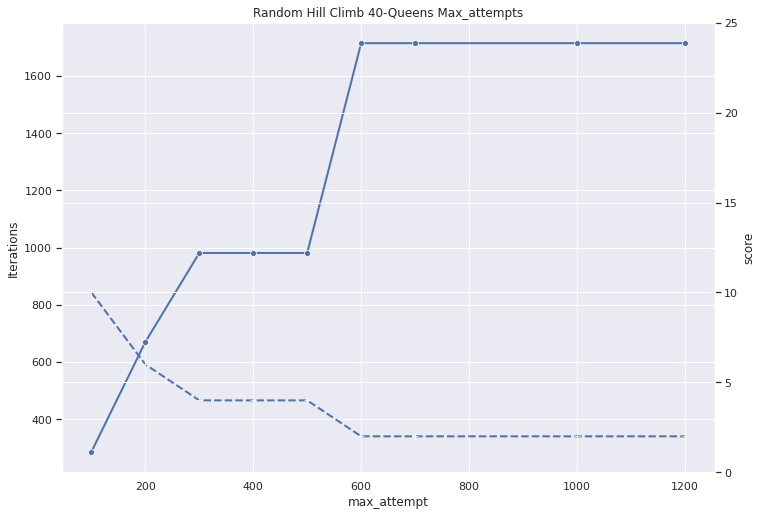

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="max_attempt", y="Iterations",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "max_attempt", y = "score" , ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 25)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Random Hill Climb 40-Queens Max_attempts")
plt.show()

In [ ]:
numberQs = list(range(4,62,2))
restarts = [0, 2, 5,  10, 20,40]

In [ ]:

def randomHillStart(restarts, numberQs):
  total = []
  for c in restarts:
    scores = []
    q = 40
    print(c,q)
    problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
                                                          max_attempts = 600, restarts = c, random_state = 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = randomHillStart(restarts, numberQs)

0 40
2 40
5 40
10 40
20 40
40 40


In [ ]:
# problem = mlrose.DiscreteOpt(length = 41, fitness_fn =  mlrose.Queens(), maximize = False, max_val = 41)
# best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
#                                                       max_attempts = 600, restarts = 10, random_state = 7641)

In [ ]:
# best_fitness

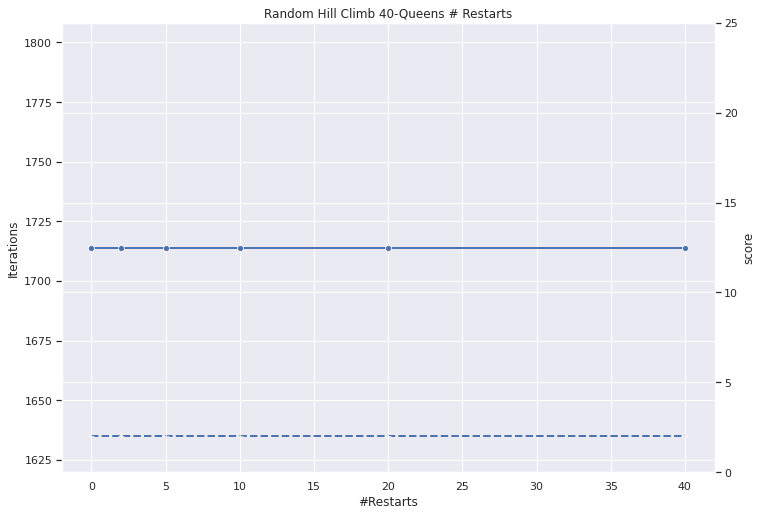

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "#Restarts"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "#Restarts"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="#Restarts", y="Iterations",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "#Restarts", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 25)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Random Hill Climb 40-Queens # Restarts")
plt.show()


In [ ]:
# def randomHillStartAll(numberQs):
#   total = []
#   c = 10
#   scores = []
#   for q in numberQs:
#     print(q)
#     problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
#     # Solve problem using randomized Hillclimb

#     best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
#                                                           max_attempts = 700, max_iters = 10000, restarts = c, random_state = 7641)
#     itemindex = np.where(curve_fit==- best_fitness)

#     scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
#     total.append(scores)
#   return total

# total = randomHillStartAll(numberQs)

4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60


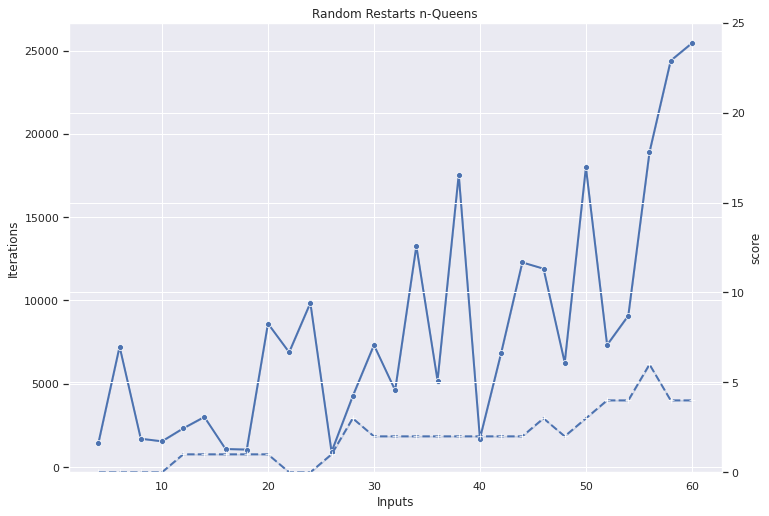

In [ ]:
# data = stackExperiments(total)

# sn.set(rc={'figure.figsize':(11.7,8.27)})
# sn.set_style("darkgrid")
# sn.lineplot(data=data, x="Inputs", y="Iterations",   marker="o", palette="Paired", markers = True, linewidth = 2)
# ax2 = plt.twinx()
# sn.lineplot(data=data, x= "Inputs", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
# ax2.set_ylim(0.0, 25)
# for i in range(len(ax2.lines)):
#   ax2.lines[i].set_linestyle("dashed") 

# plt.title("Random Restarts n-Queens")
# plt.show()

In [ ]:
# data.to_csv("randomhillNQS.csv")

### Genetic Algorithm

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000,1200]
q = 40
problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 


100
200
300
400
500
600
700
1000
1200


In [ ]:
data

Inputs  Iter_to_Convg  score  totalsize  max_attempt
0      40             18   26.0        119          100
1      40             18   26.0        219          200
2      40            279   25.0        580          300
3      40            279   25.0        680          400
4      40            780   22.0       1281          500
5      40            780   22.0       1381          600
6      40            780   22.0       1481          700
7      40            780   22.0       1781         1000
8      40            780   22.0       1981         1200

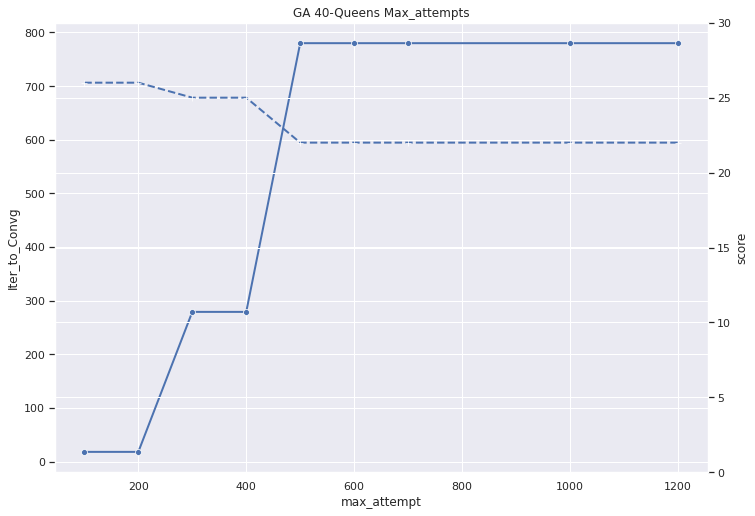

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_to_Convg", "score", "totalsize", "max_attempt"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_to_Convg", "score", "totalsize", "max_attempt"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="max_attempt", y="Iter_to_Convg",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "max_attempt", y = "score" , ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 30)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("GA 40-Queens Max_attempts")
plt.show()

In [ ]:
numberQs = list(range(4,62,2))
mutation = [0.05, 0.1, 0.15,  0.2, 0.25, 0.3, 0.35,0.4]

In [ ]:
def gATunning(mutation, numberQs):
  total = []
  for c in mutation:
    scores = []
    q = 40
    print(c,q)
    problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                          max_attempts = 500, mutation_prob  = c, pop_size = 200, random_state = 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = gATunning(mutation, numberQs)

0.05 40
0.1 40
0.15 40
0.2 40
0.25 40
0.3 40
0.35 40
0.4 40


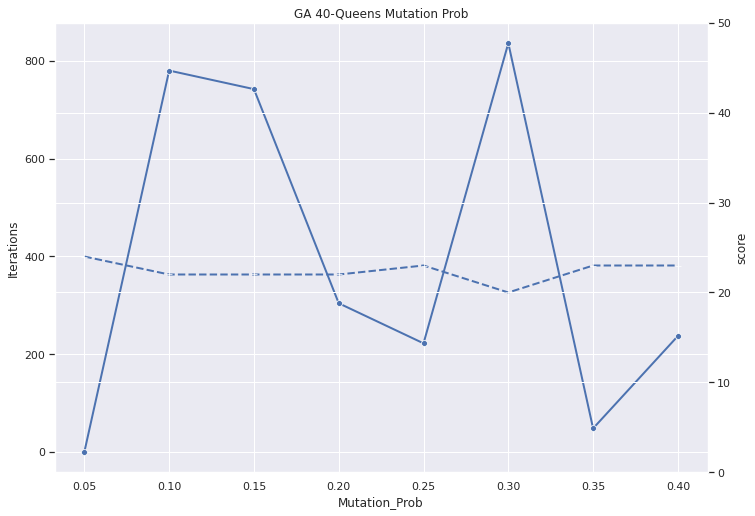

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "Mutation_Prob"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "Mutation_Prob"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Mutation_Prob", y="Iterations",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "Mutation_Prob", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 50)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("GA 40-Queens Mutation Prob")
plt.show()

In [ ]:
data

Inputs  Iterations  score  totalsize  Mutation_Prob
0      60         882   40.0       1583           0.05
1      60         533   40.0       1234           0.10
2      60          33   40.0        734           0.15
3      60         278   40.0        979           0.20
4      60         193   40.0        894           0.25
5      60          93   39.0        794           0.30
6      60          53   38.0        754           0.35
7      60         710   39.0       1411           0.40

### Mimic

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000]
q = 40
problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.mimic(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 


100
200
300
400
500
600
700
1000


In [ ]:
  # problem = mlrose.DiscreteOpt(length = 20, fitness_fn =  mlrose.Queens(), maximize = False, max_val = 20)
  # best_state, best_fitness, curve_fit = mlrose.mimic(problem, curve = True, max_attempts= 100, random_state= 7641)


In [ ]:
# curve_fit

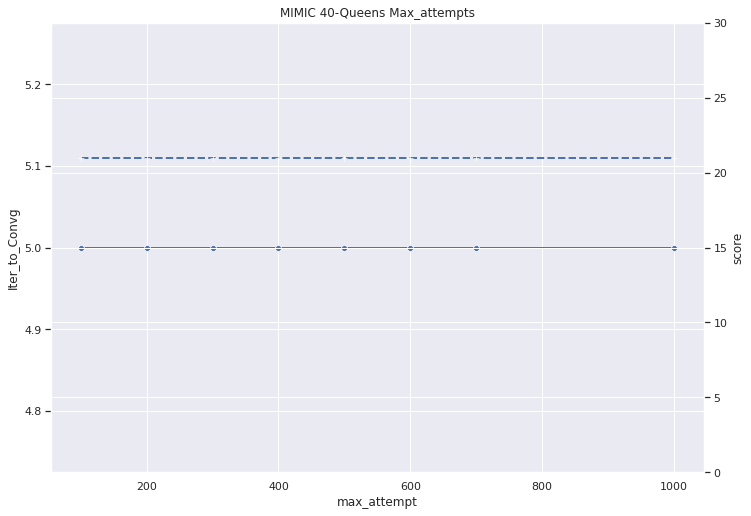

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_to_Convg", "score", "totalsize", "max_attempt"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_to_Convg", "score", "totalsize", "max_attempt"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="max_attempt", y="Iter_to_Convg",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "max_attempt", y = "score" , ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 30)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("MIMIC 40-Queens Max_attempts")
plt.show()

In [ ]:
numberQs = list(range(4,62,2))
mutation = [ 0.1, 0.15,  0.2, 0.25, 0.3, 0.35,0.4, 0.5, 0.6, 0.7]

In [ ]:
def mimicProb(mutation, numberQs):
  total = []
  for c in mutation:
    scores = []
    q = 40
    print(c,q)
    problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                          max_attempts = 100,  keep_pct = c, pop_size = 200, random_state = 7641, fast_mimic = True)
    itemindex = np.where(curve_fit==- best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = mimicProb(mutation, numberQs)

0.1 40
0.15 40
0.2 40
0.25 40
0.3 40
0.35 40
0.4 40
0.5 40
0.6 40
0.7 40


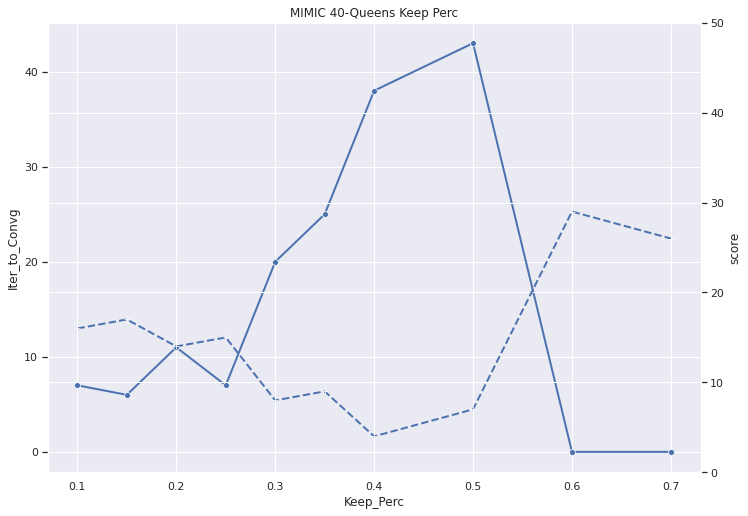

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_to_Convg", "score", "totalsize", "Keep_Perc"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_to_Convg", "score", "totalsize", "Keep_Perc"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Keep_Perc", y="Iter_to_Convg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "Keep_Perc", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
ax2.set_ylim(0.0, 50)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("MIMIC 40-Queens Keep Perc")
plt.show()

### Total

In [ ]:
numberQs = list(range(4,52,2))

def simulA(problem):
  schedule = mlrose.ExpDecay(exp_const= 0.01)
  # Solve problem using simulated annealing
  best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
                                                        max_attempts = 600,  random_state = 7641)
  return (best_state, best_fitness, curve_fit)


def randomHill(problem):
  best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
                                                          max_attempts = 600, restarts = 5, random_state = 7641)
  return (best_state, best_fitness, curve_fit)

def geneticAlg(problem):
  best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                        max_attempts = 500, mutation_prob  = 0.3, pop_size = 200, random_state = 7641) 
  return (best_state, best_fitness, curve_fit)

def mimict(problem):
  best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                        max_attempts = 100,  keep_pct = 0.4, pop_size = 200, random_state = 7641, fast_mimic = True)
  return (best_state, best_fitness, curve_fit)


prob = [(simulA, "SA"), (randomHill, "RandHill"),(geneticAlg, "GA"),(mimict, "MIMIC")  ]

In [ ]:
def nqueensP(prob, numberQs):
  total = []
  for alg in prob:
    scores = []
    for q in numberQs:
      problem = mlrose.DiscreteOpt(length = q, fitness_fn =  mlrose.Queens(), maximize = False, max_val = q)
      fnc, name = alg
    
      start = time.time()
      best_state, best_fitness, curve_fit = fnc(problem)
      end = time.time()
      itemindex = np.where(curve_fit==- best_fitness)
      print(name, q)

      scores.append((q, itemindex[0][0], best_fitness, end-start,name))
    total.append(scores)
  return total

total = nqueensP(prob, numberQs)

SA 4
SA 6
SA 8


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


SA 10
SA 12
SA 14
SA 16
SA 18
SA 20
SA 22
SA 24
SA 26
SA 28
SA 30
SA 32
SA 34
SA 36
SA 38
SA 40
SA 42
SA 44
SA 46
SA 48
SA 50
RandHill 4
RandHill 6
RandHill 8
RandHill 10
RandHill 12
RandHill 14
RandHill 16
RandHill 18
RandHill 20
RandHill 22
RandHill 24
RandHill 26
RandHill 28
RandHill 30
RandHill 32
RandHill 34
RandHill 36
RandHill 38
RandHill 40
RandHill 42
RandHill 44
RandHill 46
RandHill 48
RandHill 50
GA 4
GA 6
GA 8
GA 10
GA 12
GA 14
GA 16
GA 18
GA 20
GA 22
GA 24
GA 26
GA 28
GA 30
GA 32
GA 34
GA 36
GA 38
GA 40
GA 42
GA 44
GA 46
GA 48
GA 50
MIMIC 4
MIMIC 6
MIMIC 8
MIMIC 10
MIMIC 12
MIMIC 14
MIMIC 16
MIMIC 18
MIMIC 20
MIMIC 22
MIMIC 24
MIMIC 26
MIMIC 28
MIMIC 30
MIMIC 32
MIMIC 34
MIMIC 36
MIMIC 38
MIMIC 40
MIMIC 42
MIMIC 44
MIMIC 46
MIMIC 48
MIMIC 50


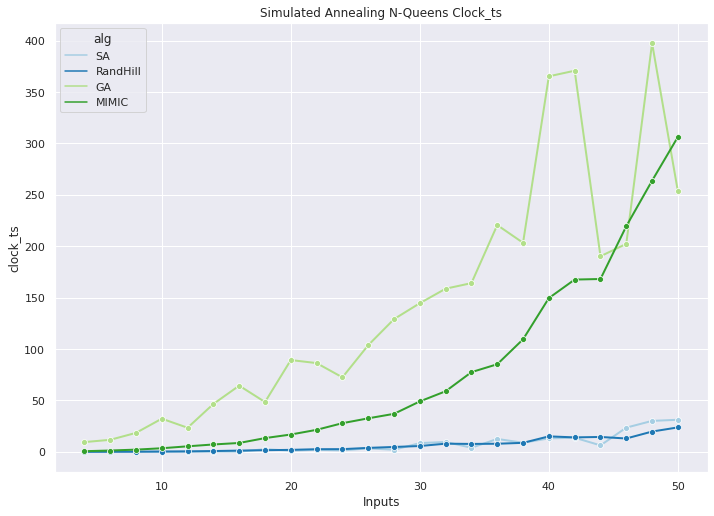

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_convg", "score", "clock_ts", "alg"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_convg", "score", "clock_ts", "alg"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="clock_ts",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("Simulated Annealing N-Queens Clock_ts")
plt.show()

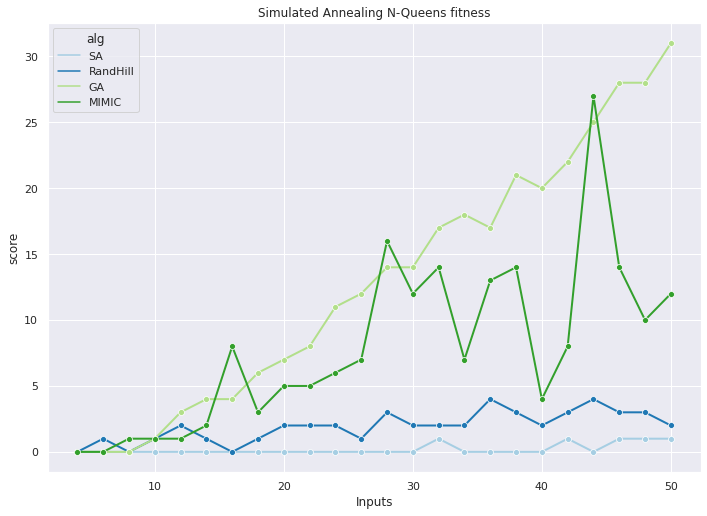

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="score",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("Simulated Annealing N-Queens fitness")
plt.show()

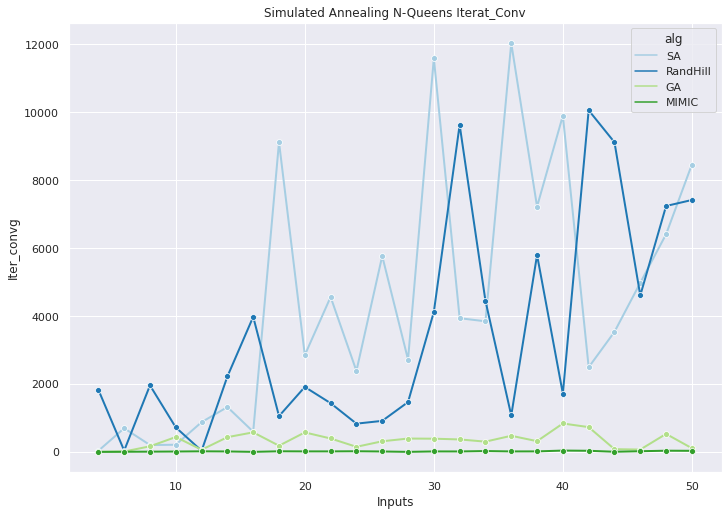

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="Iter_convg",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("Simulated Annealing N-Queens Iterat_Conv")
plt.show()

# Four Peaks
```
# This is formatted as code
```



In [ ]:
x_range = 40
y_range = 40

import random
random.seed(7641)

def generateProblem(x_range,y_range, pts):
  visit = set()
  lst = []
  for p in range(0, pts):
    x = random.randint(0,x_range)
    y = random.randint(0, y_range)
    coord = str(x)+"-"+str(y)
    while coord in visit:
      x = random.randint(0,x_range)
      y = random.randint(0, y_range)
      coord = str(x)+"-"+str(y)
    visit.add(coord)
    lst.append((x,y))
  return lst



## SA

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.25)
state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
fitness.evaluate(state)
problem = mlrose.DiscreteOpt(length = 40, fitness_fn =  fitness, maximize = True, max_val = 2)


In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000,1200]

In [ ]:
def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit== best_fitness)
    q= 40
    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt )  

/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


100
200
300
400
500
600
700
1000
1200


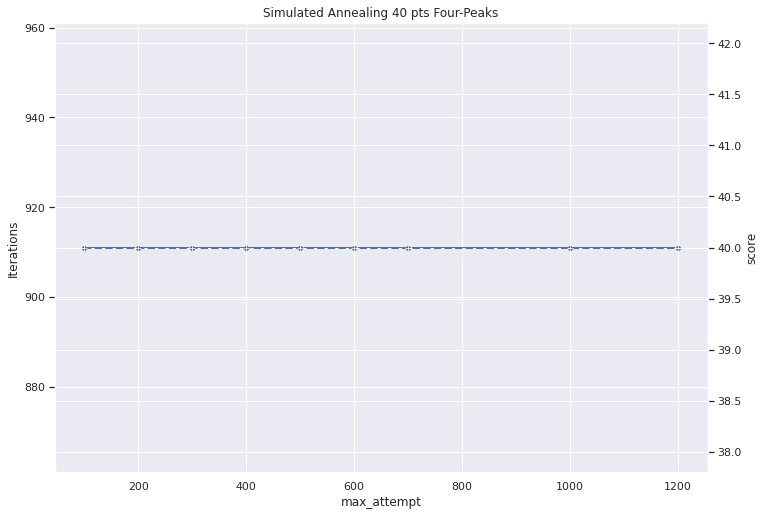

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="max_attempt", y="Iterations",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "max_attempt", y = "score" , ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
# ax2.set_ylim(0.0, 25)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Simulated Annealing 40 pts Four-Peaks")
plt.show()

In [ ]:
#decay constants

In [ ]:
exp_c = [0.001, 0.005, 0.01,  0.05, 0.075]
def tuneC(expc, problem):
  total = []
  for c in exp_c:
    scores = []
    print(c)
    q= 40
    # Define initial state
    # init_state = np.ones(q)
    # Define decay schedule
    schedule = mlrose.ExpDecay(exp_const= c)
    # Solve problem using simulated annealing

    best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
                                                          max_attempts = 200,  random_state = 7641)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = tuneC(exp_c, problem)

0.001
0.005
0.01
0.05
0.075


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


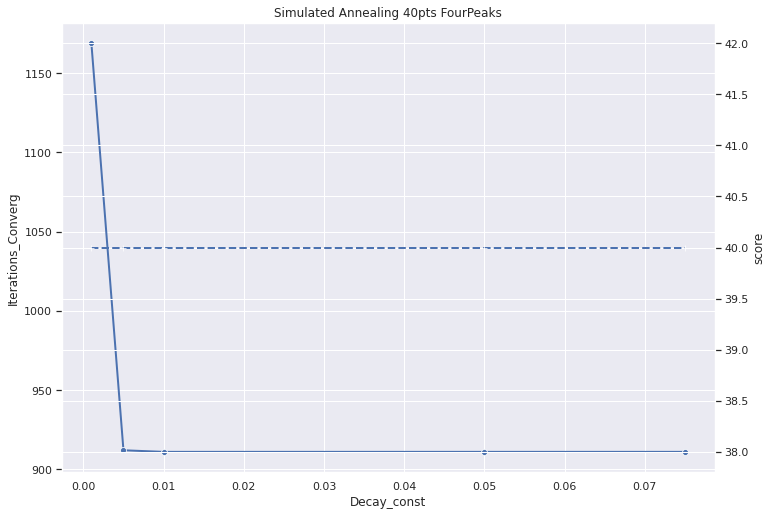

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations_Converg", "score", "totalsize", "Decay_const"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations_Converg", "score", "totalsize", "Decay_const"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data


data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Decay_const", y="Iterations_Converg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "Decay_const", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Simulated Annealing 40pts FourPeaks")
plt.show()

## Randomized Hill climb

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000,1200]
def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 

100
200
300
400
500
600
700
1000
1200


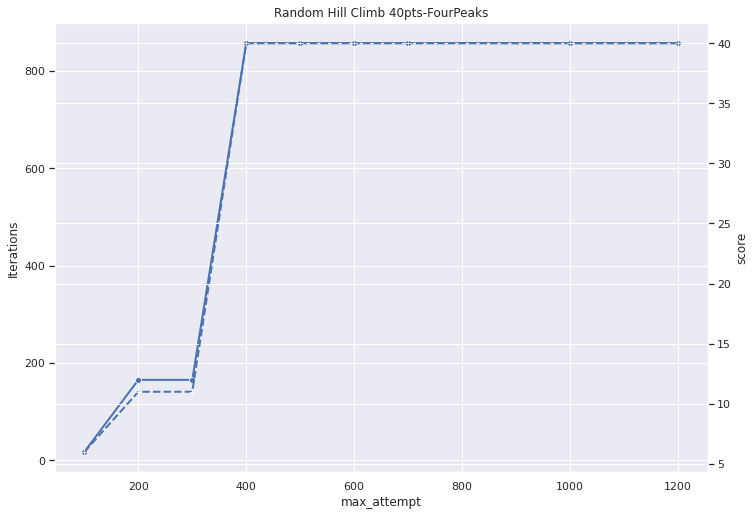

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "max_attempt"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="max_attempt", y="Iterations",  marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "max_attempt", y = "score" , ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)
for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Random Hill Climb 40pts-FourPeaks")
plt.show()

In [ ]:
restarts = [0, 2, 5,  10, 20,40]
def randomHillStart(restarts, problem):
  total = []
  for c in restarts:
    scores = []
    print(c)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
                                                          max_attempts = 400, restarts = c, random_state = 7641)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,c))
    total.append(scores)
  return total

total = randomHillStart(restarts, problem)

0
2
5
10
20
40


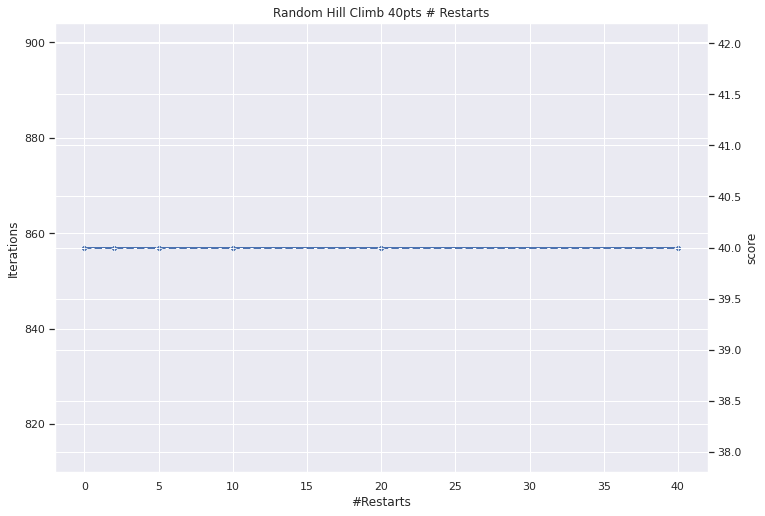

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "#Restarts"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iterations", "score", "totalsize", "#Restarts"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="#Restarts", y="Iterations",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "#Restarts", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)

for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Random Hill Climb 40pts # Restarts")
plt.show()

## Genetic Alg


In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.25)
max_attempt = [100,200,300,400,500,600,700,1000,1200]

state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
fitness.evaluate(state)
problem = mlrose.DiscreteOpt(length = 40, fitness_fn =  fitness, maximize = True, max_val = 2)

def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 


100
200
300
400
500
600
700
1000
1200


In [ ]:
def itereConve(total, title):

  data = pd.DataFrame()
  for val in total:
    max_size =  val[0][3].size
    if val[0][3].size > max_size:
      max_size = val[0][3].size
  print(max_size, "max")
  converg = pd.DataFrame()
  for val in total:
    sz = val[0][3].size
    if sz<max_size:
      diff = max_size - sz
      fit = [max(val[0][3])] * diff
      end = np.append(val[0][3], fit)
      converg[val[0][4]] = end
    else:
      converg[val[0][4]] = val[0][3]
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=converg, linewidth = 2, palette= "Paired")

  plt.title("GA 40pts TS Max_attempts")
  plt.xlabel("Iterations")
  plt.ylabel("fitness")
  plt.show()

itereConve(total)




TypeError: ignored

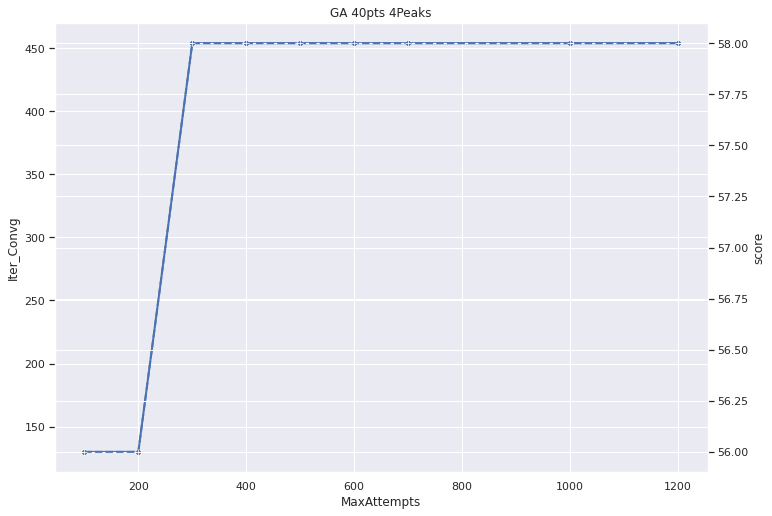

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="MaxAttempts", y="Iter_Convg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "MaxAttempts", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)

for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("GA 40pts 4Peaks")
plt.show()

In [ ]:
numberQs = list(range(4,62,2))
mutation = [0.05, 0.1, 0.15,  0.2, 0.25, 0.3, 0.35,0.4]

In [ ]:
def gATunning(mutation, problem):
  total = []
  for c in mutation:
    scores = []
    print(c)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                          max_attempts = 400, mutation_prob  = c, pop_size = 200, random_state = 7641)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,c))
    total.append(scores)
  return total

total = gATunning(mutation, problem)

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4


855 max


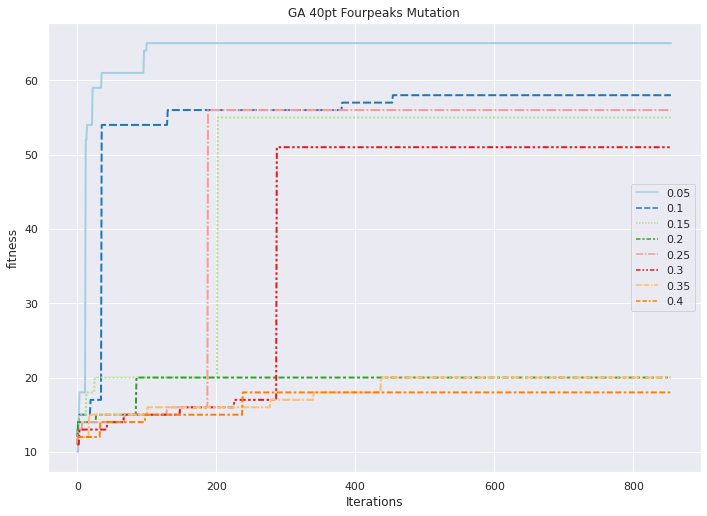

In [ ]:
def itereConve(total, title):

  data = pd.DataFrame()
  max_size = 0
  for val in total:
    if val[0][3].size > max_size:
      max_size = val[0][3].size
  print(max_size, "max")
  converg = pd.DataFrame()
  for val in total:
    sz = val[0][3].size
    if sz<max_size:
      diff = max_size - sz
      fit = [max(val[0][3])] * diff
      end = np.append(val[0][3], fit)
      converg[val[0][4]] = end
    else:
      converg[val[0][4]] = val[0][3]
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=converg, linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("Iterations")
  plt.ylabel("fitness")
  plt.show()

itereConve(total, "GA 40pt Fourpeaks Mutation")

In [ ]:
#tune pop size
pop = [100,200,300,400,500,700,900]
def gATunningPop(pop, problem):
  total = []
  for c in pop:
    scores = []
    print(c)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                          max_attempts = 400, mutation_prob  = 0.05, pop_size = c, random_state = 7641)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,c))
    total.append(scores)
  return total

total = gATunningPop(pop, problem)

100
200
300
400
500
700
900


1174 max


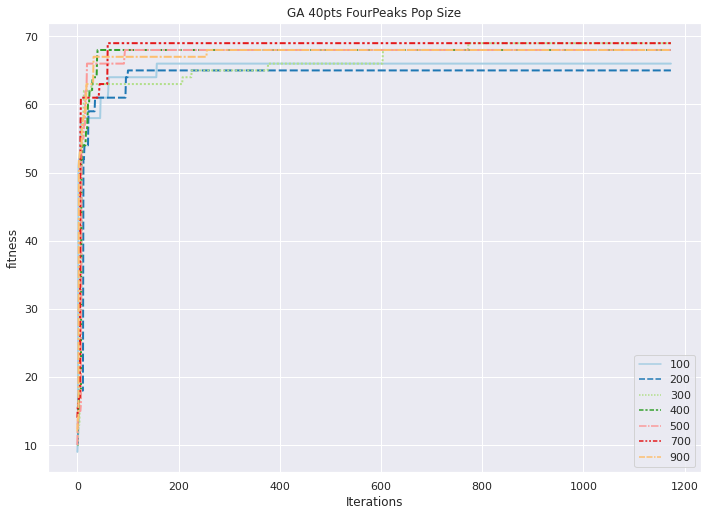

In [ ]:
itereConve(total, "GA 40pts FourPeaks Pop Size")

## Mimic

In [ ]:
# fitness = mlrose.FourPeaks(t_pct=0.25)
# max_attempt = [100,200,300,400,500,600,700,1000]

# state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
# fitness.evaluate(state)
# problem = mlrose.DiscreteOpt(length = 40, fitness_fn =  fitness, maximize = True, max_val = 2)

def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.mimic(problem, curve = True, max_attempts= p, random_state= 7641, fast_mimic= True)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 

100
200
300
400
500
600
700
1000
1200


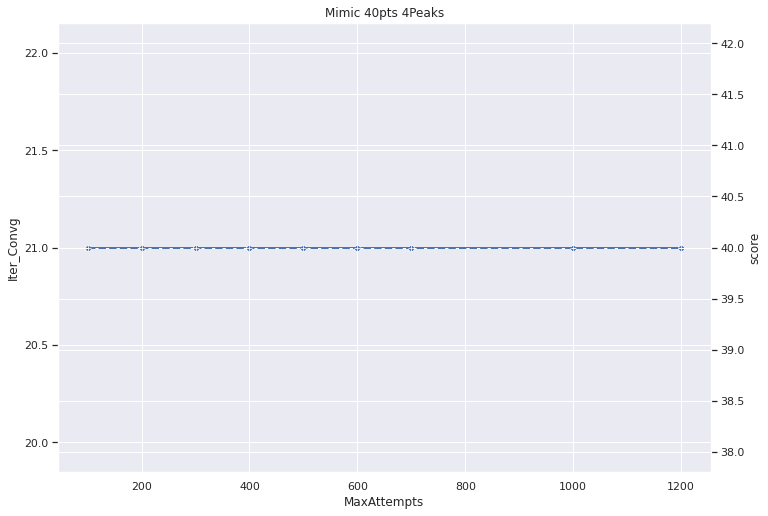

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="MaxAttempts", y="Iter_Convg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "MaxAttempts", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)

for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Mimic 40pts 4Peaks")
plt.show()

In [ ]:
mutation = [ 0.1, 0.15,  0.2, 0.25, 0.3, 0.35,0.4, 0.5, 0.6, 0.7]

In [ ]:
def mimicProb(mutation, problem):
  total = []
  for c in mutation:
    scores = []

    print(c)
    # Solve problem using randomized Hillclimb
    best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                          max_attempts = 100,  keep_pct = c, pop_size = 200, random_state = 7641, fast_mimic = True)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = mimicProb(mutation, problem)

0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.5
0.6
0.7


171 max


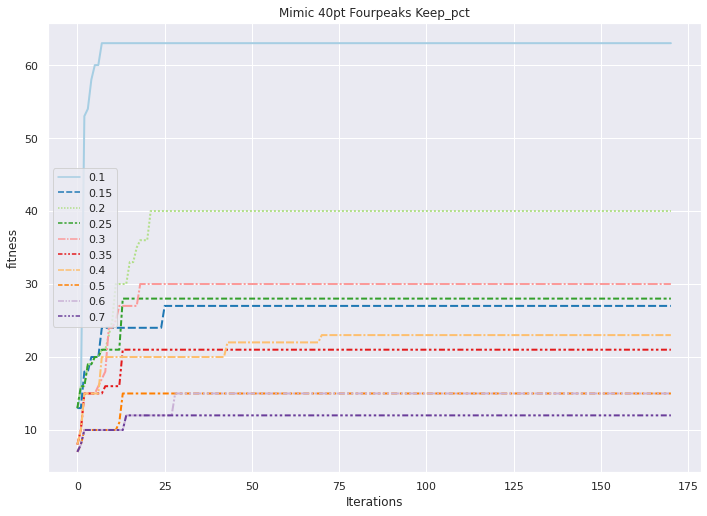

In [ ]:
def itereConve(total, title):

  data = pd.DataFrame()
  max_size = 0
  for val in total:
    if val[0][3].size > max_size:
      max_size = val[0][3].size
  print(max_size, "max")
  converg = pd.DataFrame()
  for val in total:
    sz = val[0][3].size
    if sz<max_size:
      diff = max_size - sz
      fit = [max(val[0][3])] * diff
      end = np.append(val[0][3], fit)
      converg[val[0][4]] = end
    else:
      converg[val[0][4]] = val[0][3]
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=converg, linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("Iterations")
  plt.ylabel("fitness")
  plt.show()

itereConve(total, "Mimic 40pt Fourpeaks Keep_pct")

In [ ]:
pop = [100,200,300,400,500,700,900]


In [ ]:
def mimicPop(pop, problem):
  total = []
  for c in pop:
    scores = []

    print(c)
    # Solve problem using randomized Hillclimb
    best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                          max_attempts = 100,  keep_pct = 0.1, pop_size = c, random_state = 7641, fast_mimic = True)
    itemindex = np.where(curve_fit== best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = mimicPop(pop, problem)

100
200
300
400
500
700
900


140 max


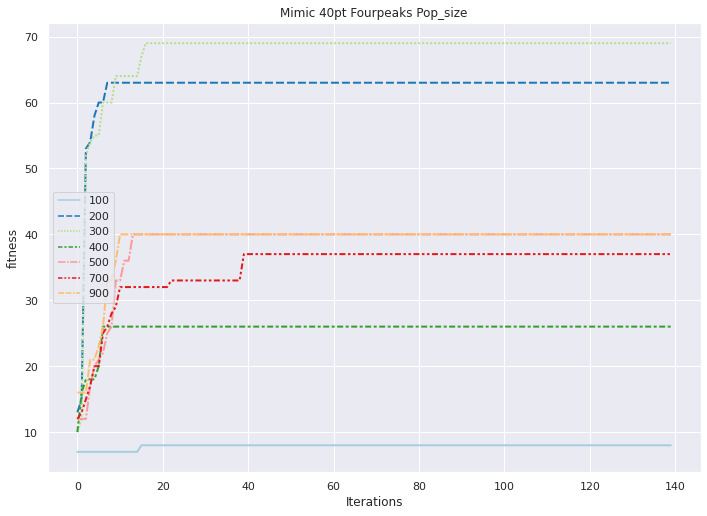

In [ ]:
itereConve(total, "Mimic 40pt Fourpeaks Pop_size")

## Total

In [ ]:

def simulA(problem):
  schedule = mlrose.ExpDecay(exp_const= 0.01)
  # Solve problem using simulated annealing
  best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
                                                        max_attempts = 100,  random_state = 7641)
  return (best_state, best_fitness, curve_fit)


def randomHill(problem):
  best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
                                                          max_attempts = 100, restarts = 5, random_state = 7641)
  return (best_state, best_fitness, curve_fit)

def geneticAlg(problem):
  best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                        max_attempts = 300, mutation_prob  = 0.05, pop_size = 700, random_state = 7641) 
  return (best_state, best_fitness, curve_fit)

def mimict(problem):
  best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                        max_attempts = 100,  keep_pct = 0.1, pop_size = 300, random_state = 7641, fast_mimic = True)
  return (best_state, best_fitness, curve_fit)


prob = [(simulA, "SA"), (randomHill, "RandHill"),(geneticAlg, "GA"),(mimict, "MIMIC")  ]

In [ ]:
numberPeaks = list(range(4,52,2))

# fitness = mlrose.FourPeaks(t_pct=0.25)
# state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])
# fitness.evaluate(state)
# problem = mlrose.DiscreteOpt(length = 40, fitness_fn =  fitness, maximize = True, max_val = 2)


In [ ]:
def nPeaks(prob, numberQs):
  total = []
  for alg in prob:
    scores = []
    for q in numberQs:
      problem = mlrose.DiscreteOpt(length = q, fitness_fn = mlrose.FourPeaks(t_pct=0.25), maximize = True, max_val = 2)
      fnc, name = alg
    
      start = time.time()
      best_state, best_fitness, curve_fit = fnc(problem)
      end = time.time()
      itemindex = np.where(curve_fit== best_fitness)
      print(name, q)

      scores.append((q, itemindex[0][0], best_fitness, end-start,name))
    total.append(scores)
  return total

total = nPeaks(prob, numberPeaks)

SA 4
SA 6
SA 8
SA 10
SA 12
SA 14
SA 16
SA 18
SA 20
SA 22
SA 24
SA 26
SA 28
SA 30
SA 32
SA 34
SA 36
SA 38


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


SA 40
SA 42
SA 44
SA 46
SA 48
SA 50
RandHill 4
RandHill 6
RandHill 8
RandHill 10
RandHill 12
RandHill 14
RandHill 16
RandHill 18
RandHill 20
RandHill 22
RandHill 24
RandHill 26
RandHill 28
RandHill 30
RandHill 32
RandHill 34
RandHill 36
RandHill 38
RandHill 40
RandHill 42
RandHill 44
RandHill 46
RandHill 48
RandHill 50
GA 4
GA 6
GA 8
GA 10
GA 12
GA 14
GA 16
GA 18
GA 20
GA 22
GA 24
GA 26
GA 28
GA 30
GA 32
GA 34
GA 36
GA 38
GA 40
GA 42
GA 44
GA 46
GA 48
GA 50
MIMIC 4
MIMIC 6
MIMIC 8
MIMIC 10
MIMIC 12
MIMIC 14
MIMIC 16
MIMIC 18
MIMIC 20
MIMIC 22
MIMIC 24
MIMIC 26
MIMIC 28
MIMIC 30
MIMIC 32
MIMIC 34
MIMIC 36
MIMIC 38
MIMIC 40
MIMIC 42
MIMIC 44
MIMIC 46
MIMIC 48
MIMIC 50


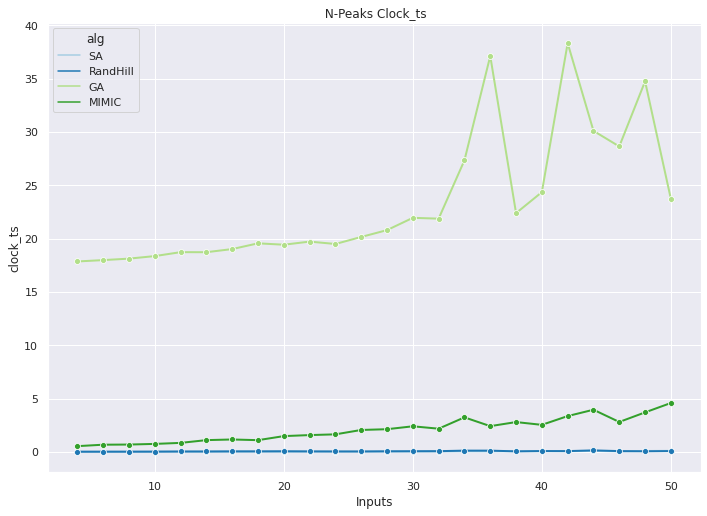

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_convg", "score", "clock_ts", "alg"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_convg", "score", "clock_ts", "alg"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="clock_ts",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title(" N-Peaks Clock_ts")
plt.show()

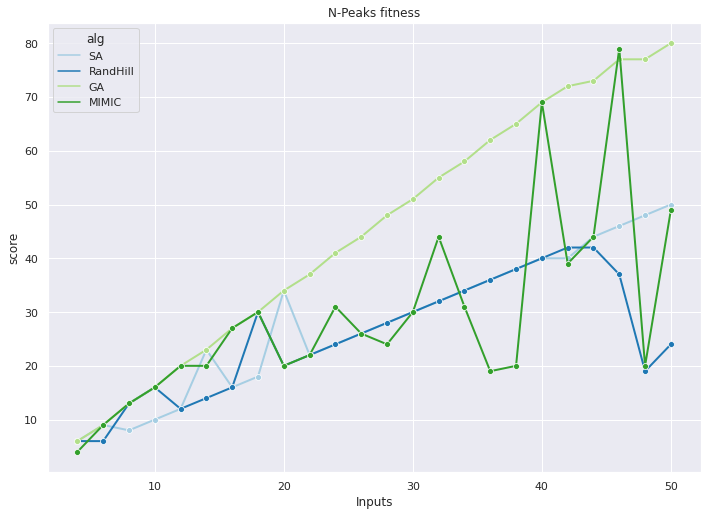

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="score",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("N-Peaks fitness")
plt.show()

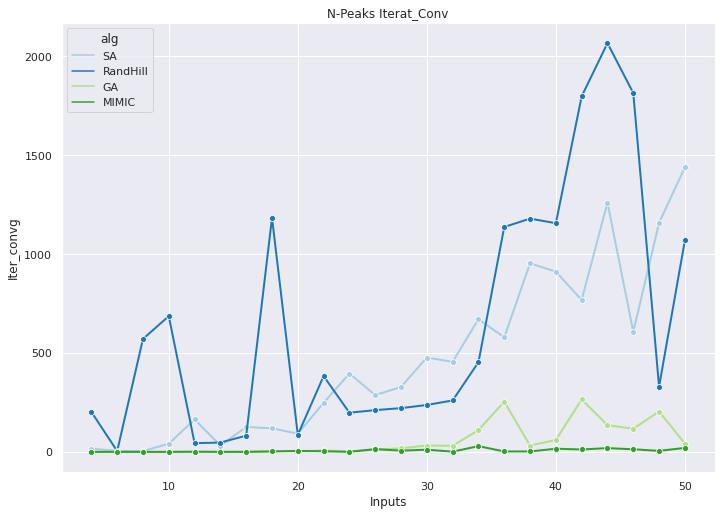

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="Iter_convg",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("N-Peaks Iterat_Conv")
plt.show()

# k - coloring

In [ ]:
from networkx.generators.random_graphs import erdos_renyi_graph
n = 20
p = 0.3
g = erdos_renyi_graph(n, p, seed=7641)
print(g.nodes)
print(g.edges)
fitness = mlrose.MaxKColor(g.edges)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[(0, 4), (0, 7), (0, 12), (0, 19), (1, 2), (1, 5), (1, 8), (1, 15), (2, 4), (2, 5), (2, 10), (2, 12), (3, 5), (3, 6), (3, 7), (3, 10), (3, 14), (3, 15), (3, 16), (3, 19), (4, 9), (4, 10), (4, 12), (4, 13), (4, 18), (5, 9), (5, 11), (5, 15), (5, 16), (5, 19), (6, 12), (6, 17), (6, 18), (6, 19), (7, 12), (7, 19), (8, 10), (8, 11), (8, 14), (8, 18), (9, 10), (9, 13), (9, 15), (9, 17), (10, 11), (10, 12), (10, 17), (10, 18), (11, 14), (11, 15), (11, 18), (11, 19), (13, 15), (14, 18), (15, 16), (15, 17), (15, 19), (16, 18)]


### Test

In [ ]:
problem = mlrose.DiscreteOpt(length = len(g.edges), fitness_fn =  fitness, maximize = False, max_val=2)


In [ ]:
best_state_m, best_fitness_m, curve_fit_m = mlrose.mimic(problem, curve = True, max_attempts= 100, random_state= 7641)

In [ ]:
best_fitness_m

16.0

In [ ]:
best_state_g, best_fitness_g, curve_fit_g = mlrose.genetic_alg(problem, curve = True, max_attempts= 100, random_state= 7641)

In [ ]:
best_fitness_g

17.0

In [ ]:
best_state_g, best_fitness_g, curve_fit_g = mlrose.simulated_annealing(problem, curve = True, max_attempts= 500, max_iters=10000,random_state= 7641)

In [ ]:
best_fitness_g

17.0

## MIMIC

In [ ]:
n = 15
p = 0.5
g = erdos_renyi_graph(n, p, seed=7641)
print(g.nodes)
print(g.edges)
fitness = mlrose.MaxKColor(g.edges)
problem = mlrose.DiscreteOpt(length = len(g.edges), fitness_fn =  fitness, maximize = False, max_val=3)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[(0, 4), (0, 7), (0, 8), (0, 9), (0, 11), (0, 12), (0, 13), (1, 2), (1, 3), (1, 6), (1, 7), (1, 10), (1, 11), (1, 13), (1, 14), (2, 4), (2, 8), (2, 13), (2, 14), (3, 4), (3, 7), (3, 8), (3, 9), (3, 11), (3, 14), (4, 6), (4, 7), (4, 10), (4, 11), (4, 12), (4, 13), (5, 6), (5, 9), (5, 10), (5, 11), (5, 12), (6, 7), (6, 8), (6, 12), (6, 13), (7, 8), (7, 9), (7, 10), (7, 13), (7, 14), (8, 13), (9, 10), (9, 11), (9, 14), (10, 11), (10, 12), (10, 14), (11, 13), (13, 14)]


In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000]

def maxAttempts(problem, max_att):
  total = []
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.mimic(problem, curve = True, max_attempts= p, random_state= 7641, fast_mimic= True)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt )

KeyboardInterrupt: ignored

In [ ]:
print(len(g.edges))

54


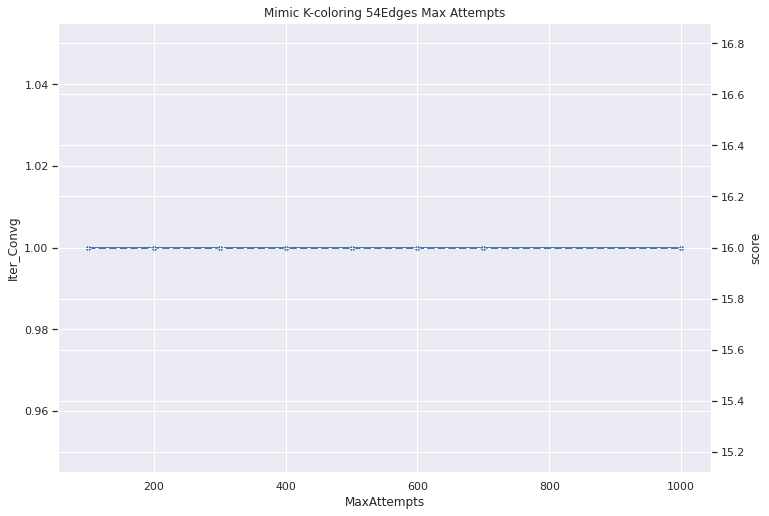

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="MaxAttempts", y="Iter_Convg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "MaxAttempts", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)

for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("Mimic K-coloring 54Edges Max Attempts")
plt.show()

In [ ]:
mutation = [ 0.1, 0.15,  0.2, 0.25, 0.3, 0.35,0.4, 0.5, 0.6, 0.7]

In [ ]:
def mimicProb(mutation, problem):
  total = []
  for c in mutation:
    scores = []

    print(c)
    # Solve problem using randomized Hillclimb
    best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                          max_attempts = 100,  keep_pct = c, pop_size = 200, random_state = 7641, fast_mimic = True)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = mimicProb(mutation, problem)

0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.5
0.6
0.7


109 max


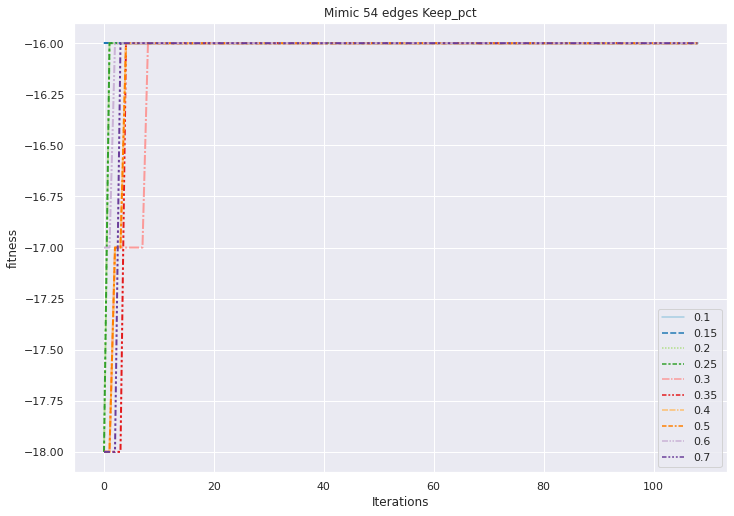

In [ ]:
itereConve(total, "Mimic 54 edges Keep_pct")

In [ ]:
pop = [100,200,300,400,500,700,900]
def mimicPop(pop, problem):
  total = []
  for c in pop:
    scores = []

    print(c)
    # Solve problem using randomized Hillclimb
    best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                          max_attempts = 100,  keep_pct = 0.2, pop_size = c, random_state = 7641, fast_mimic = True)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = mimicPop(pop, problem)

100
200
300
400
500
700
900


113 max


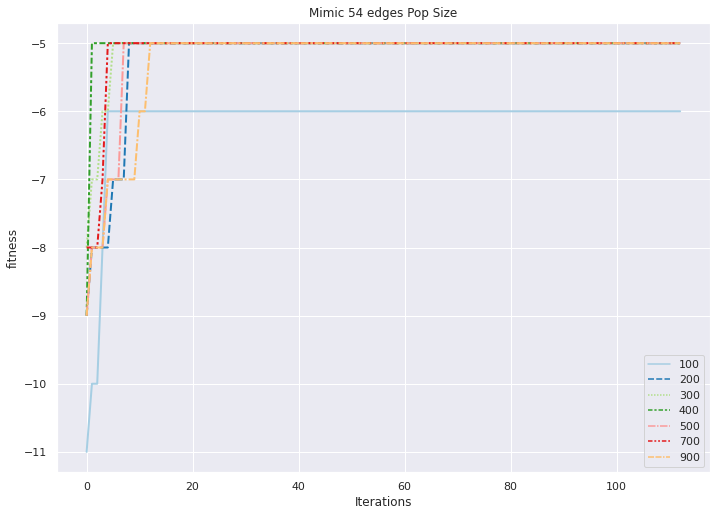

In [ ]:
itereConve(total, "Mimic 54 edges Pop Size")

## Simulated Annealing

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000]

In [ ]:
def maxAttempts(problem, max_att):
  total = []
  q = 54
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, curve = True, max_attempts= p, random_state= 7641, max_iters=10000)
    itemindex = np.where(curve_fit== - best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt )

100
200
300
400
500
600
700
1000


10000 max


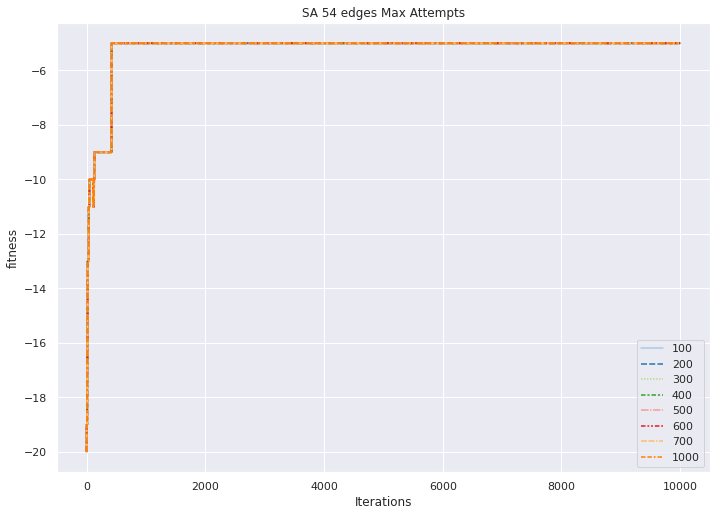

In [ ]:
itereConve(total, "SA 54 edges Max Attempts")

In [ ]:
exp_c = [0.001, 0.005, 0.01,  0.05, 0.075]
def tuneC(expc, problem):
  total = []
  for c in exp_c:
    scores = []
    print(c)

    # Define initial state
    # Define decay schedule
    schedule = mlrose.ExpDecay(exp_const= c)
    # Solve problem using simulated annealing

    best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True,
                                                          max_attempts = 200, max_iters = 10000, random_state = 7641)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = tuneC(exp_c, problem)

0.001
0.005
0.01
0.05


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


0.075


10000 max


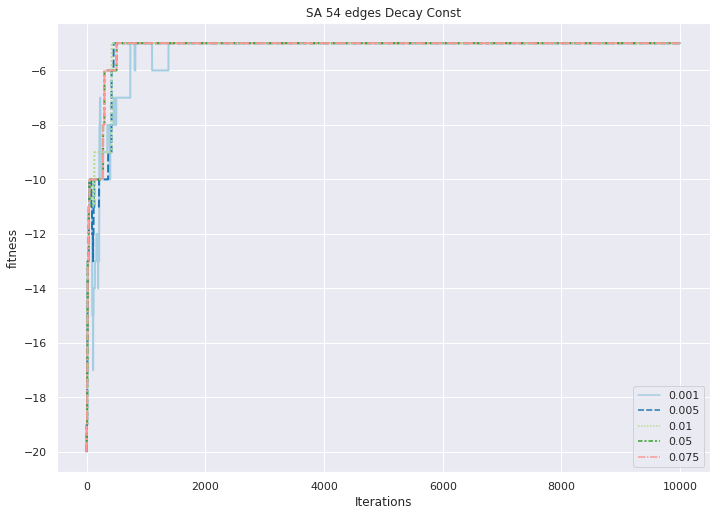

In [ ]:
itereConve(total, "SA 54 edges Decay Const")

## Randomized Hill Climb

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000,1200]
def maxAttempts(problem, max_att):
  total = []
  q = 54
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit.size,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt ) 

100
200
300
400
500
600
700
1000
1200


In [ ]:
total

[[(54, 230, 7.0, 331, 100)],
 [(54, 230, 7.0, 431, 200)],
 [(54, 230, 7.0, 531, 300)],
 [(54, 230, 7.0, 631, 400)],
 [(54, 230, 7.0, 731, 500)],
 [(54, 230, 7.0, 831, 600)],
 [(54, 230, 7.0, 931, 700)],
 [(54, 230, 7.0, 1231, 1000)],
 [(54, 230, 7.0, 1431, 1200)]]

In [ ]:
restarts = [0, 2, 5,  10, 20]
def randomHillStart(restarts, problem):
  total = []
  q = 54
  for c in restarts:
    scores = []
    print(c)
    # Solve problem using randomized Hillclimb

    best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True,
                                                          max_attempts = 100, restarts = c, random_state = 7641)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = randomHillStart(restarts, problem)

0
2
5
10
20


In [ ]:

# total

4792 max


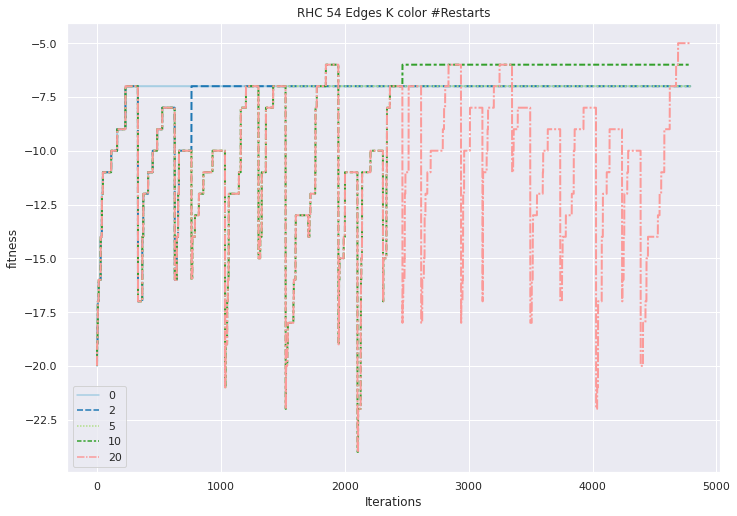

In [ ]:
def itereConve(total, title):

  data = pd.DataFrame()
  max_size = 0
  for val in total:
    if val[0][3].size > max_size:
      max_size = val[0][3].size
  print(max_size, "max")
  converg = pd.DataFrame()
  for val in total:
    sz = val[0][3].size
    if sz<max_size:
      diff = max_size - sz
      fit = [max(val[0][3])] * diff
      end = np.append(val[0][3], fit)
      converg[val[0][4]] = end
    else:
      converg[val[0][4]] = val[0][3]
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=converg, linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("Iterations")
  plt.ylabel("fitness")
  plt.show()

itereConve(total, "RHC 54 Edges K color #Restarts")

### Genetic Alg

In [ ]:
max_attempt = [100,200,300,400,500,600,700,1000]

def maxAttempts(problem, max_att):
  total = []
  q = 54
  for p in max_att:
    scores = []
    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem, curve = True, max_attempts= p, random_state= 7641)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit ,p))
    total.append(scores)
    print(p)
  return total

total = maxAttempts(problem,max_attempt )

100
200
300
400
500
600
700
1000


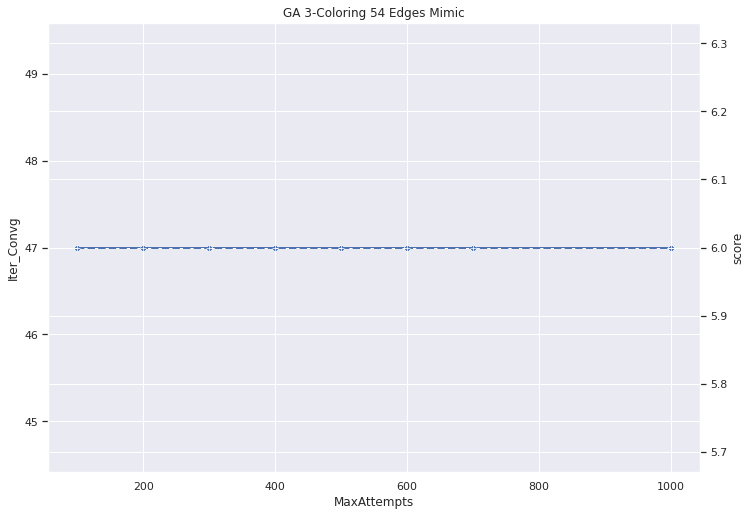

In [ ]:
def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_Convg", "score", "totalsize", "MaxAttempts"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)


sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="MaxAttempts", y="Iter_Convg",   marker="o", palette="Paired", markers = True, linewidth = 2)
ax2 = plt.twinx()
sn.lineplot(data=data, x= "MaxAttempts", y = "score" ,  ax=ax2, palette= "Paired", marker = "+", dashes= True, linewidth = 2)

for i in range(len(ax2.lines)):
  ax2.lines[i].set_linestyle("dashed") 

plt.title("GA 3-Coloring 54 Edges Mimic")
plt.show()

In [ ]:
mutation = [0.05, 0.1, 0.15,  0.2, 0.25, 0.3, 0.35,0.4]
def mimicProb(mutation, problem):
  total = []
  q = 54
  for c in mutation:
    scores = []

    print(c)
    # Solve problem using randomized Hillclimb
    best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                          max_attempts = 100,  mutation_prob = c, pop_size = 200, random_state = 7641)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = mimicProb(mutation, problem)

0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4


186 max


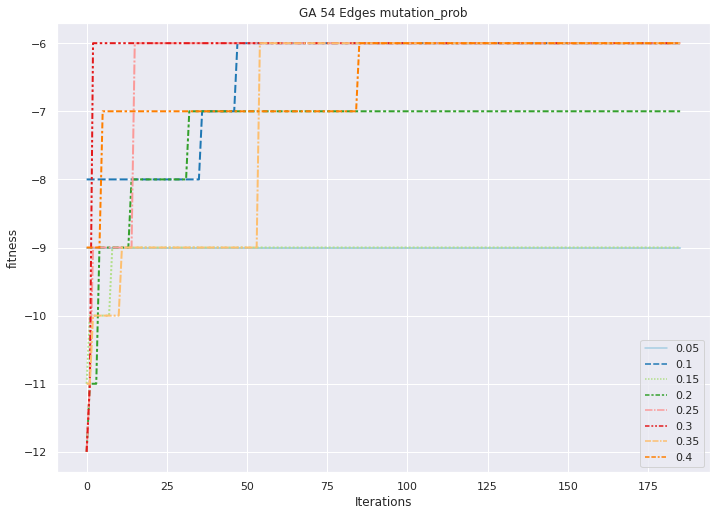

In [ ]:
itereConve(total, "GA 54 Edges mutation_prob")

In [ ]:
pop = [100,200,300,400,500,700,900]
def mimicPop(pop, problem):
  total = []
  q = 54
  for c in pop:
    scores = []

    print(c)
    # Solve problem using randomized Hillclimb
    best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                          max_attempts = 100,  keep_pct = 0.3, pop_size = c, random_state = 7641, fast_mimic = True)
    itemindex = np.where(curve_fit== -best_fitness)

    scores.append((q, itemindex[0][0], best_fitness, curve_fit,c))
    total.append(scores)
  return total

total = mimicPop(pop, problem)

100
200
300
400
500
700
900


113 max


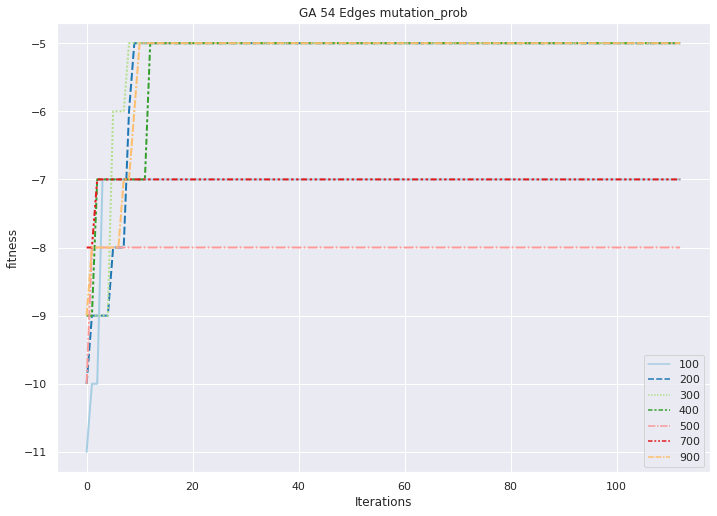

In [ ]:
itereConve(total, "GA 54 Edges mutation_prob")

## Total

In [ ]:

def simulA(problem):
  schedule = mlrose.ExpDecay(exp_const= 0.01)
  # Solve problem using simulated annealing
  best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, schedule = schedule, curve= True, max_iters= 10000,
                                                        max_attempts = 100,  random_state = 7641)
  return (best_state, best_fitness, curve_fit)


def randomHill(problem):
  best_state, best_fitness, curve_fit = mlrose.random_hill_climb(problem,  curve= True, max_iters= 10000,
                                                          max_attempts = 100, restarts = 20, random_state = 7641)
  return (best_state, best_fitness, curve_fit)

def geneticAlg(problem):
  best_state, best_fitness, curve_fit = mlrose.genetic_alg(problem,  curve= True,
                                                        max_attempts = 300, mutation_prob  = 0.3, pop_size = 300, random_state = 7641) 
  return (best_state, best_fitness, curve_fit)

def mimict(problem):
  best_state, best_fitness, curve_fit = mlrose.mimic(problem,  curve= True,
                                                        max_attempts = 100,  keep_pct = 0.2, pop_size = 400, random_state = 7641, fast_mimic = True)
  return (best_state, best_fitness, curve_fit)


prob = [(simulA, "SA"), (randomHill, "RandHill"),(mimict, "MIMIC"), (geneticAlg, "GA")  ]

In [ ]:
color_k = list(range(8,40,2))
# color_k = [12]

In [ ]:
n = 8
p = 0.3
g = erdos_renyi_graph(n, p, seed=7641)
print(g.nodes)
print(g.edges)
fitness = mlrose.MaxKColor(g.edges)

[0, 1, 2, 3, 4, 5, 6, 7]
[(0, 4), (0, 7), (1, 6), (3, 4), (3, 5), (4, 5), (5, 6)]


In [ ]:
def k_coloring(prob, numberQs):
  total = []
  p = 0.7
  for alg in prob:
    scores = []
    for q in numberQs:
      g = erdos_renyi_graph(q, p, seed=7641)
      fitness = mlrose.MaxKColor(g.edges)
      problem = mlrose.DiscreteOpt(length = len(g.edges), fitness_fn =  fitness, maximize = False, max_val=3)
      fnc, name = alg
      start = time.time()
      best_state, best_fitness, curve_fit = fnc(problem)
      end = time.time()
      itemindex = np.where(curve_fit== -best_fitness)
      print(name, q, best_fitness)

      scores.append((q, itemindex[0][0], best_fitness, end-start,name))
    total.append(scores)
  return total

total = k_coloring(prob, color_k)

SA 8 1.0
SA 10 4.0


/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


SA 12 7.0
SA 14 10.0
SA 16 11.0
SA 18 19.0
SA 20 22.0
SA 22 32.0
SA 24 37.0
SA 26 45.0
SA 28 54.0
SA 30 67.0
SA 32 81.0
SA 34 93.0
SA 36 100.0
SA 38 121.0
RandHill 8 1.0
RandHill 10 4.0
RandHill 12 7.0
RandHill 14 11.0
RandHill 16 12.0
RandHill 18 18.0
RandHill 20 24.0
RandHill 22 33.0
RandHill 24 43.0
RandHill 26 55.0
RandHill 28 64.0
RandHill 30 72.0
RandHill 32 92.0
RandHill 34 100.0
RandHill 36 121.0
RandHill 38 134.0
MIMIC 8 1.0
MIMIC 10 4.0
MIMIC 12 7.0
MIMIC 14 11.0
MIMIC 16 12.0
MIMIC 18 19.0
MIMIC 20 23.0
MIMIC 22 32.0
MIMIC 24 37.0
MIMIC 26 47.0
MIMIC 28 60.0
MIMIC 30 70.0
MIMIC 32 80.0
MIMIC 34 92.0
MIMIC 36 108.0
MIMIC 38 119.0
GA 8 1.0
GA 10 4.0
GA 12 7.0
GA 14 11.0
GA 16 12.0
GA 18 20.0
GA 20 26.0
GA 22 36.0
GA 24 45.0
GA 26 53.0
GA 28 65.0
GA 30 75.0
GA 32 89.0
GA 34 103.0
GA 36 121.0
GA 38 134.0


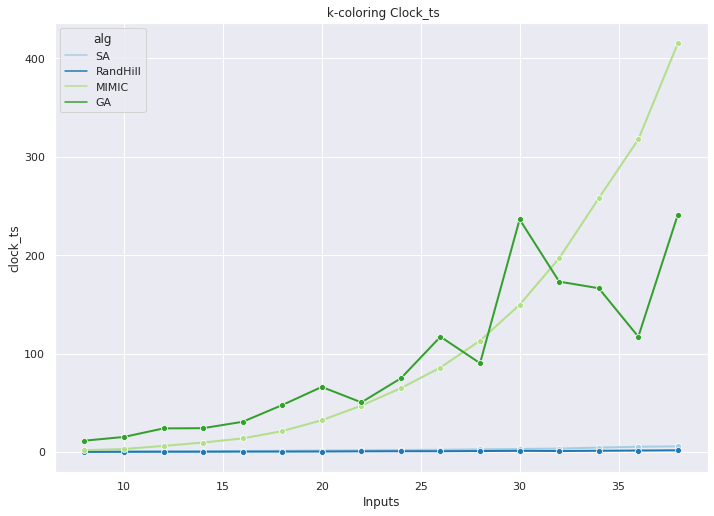

In [ ]:
sn.set(rc={'figure.figsize':(12.7,10.27)})
sn.set_style("darkgrid")
# data = pd.DataFrame(columns = ["Inputs"])
# data.Inputs = numberQs


def stackExperiments(total):
  counter = 0
  for scores in total:
    # q,iter, scoreV, totaliter,c = list(zip(*scores))
    
    if counter == 0:
      data = pd.DataFrame(scores, columns = ["Inputs", "Iter_convg", "score", "clock_ts", "alg"])
    else:
      new = pd.DataFrame(scores, columns = ["Inputs", "Iter_convg", "score", "clock_ts", "alg"])
      data = data.append(new, ignore_index=True)
    counter += 1
  return data

data = stackExperiments(total)

sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="clock_ts",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title(" k-coloring Clock_ts")
plt.show()

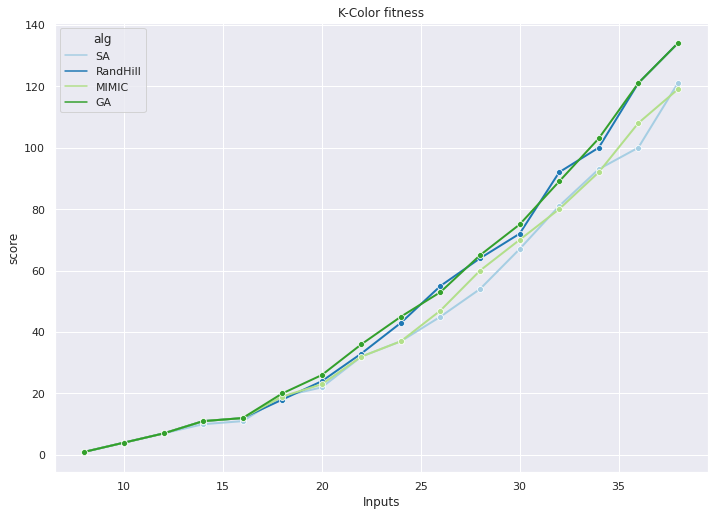

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="score",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("K-Color fitness")
plt.show()

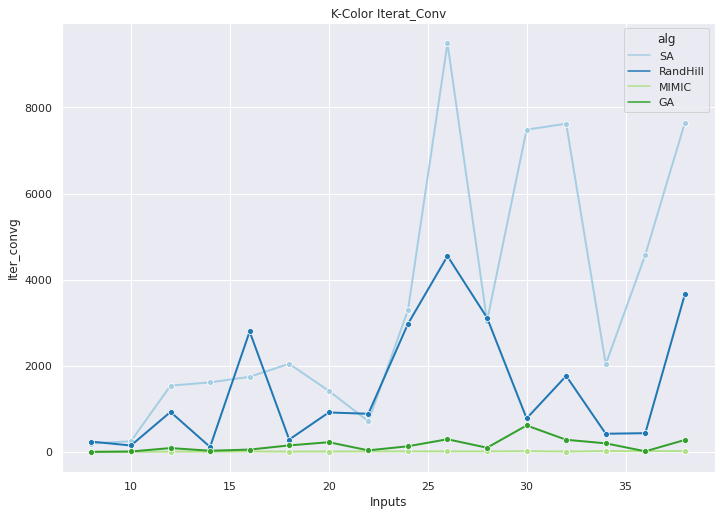

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.set_style("darkgrid")
sn.lineplot(data=data, x="Inputs", y="Iter_convg",  hue = "alg",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("K-Color Iterat_Conv")
plt.show()

In [ ]:
n = 30
p = 0.5
g = erdos_renyi_graph(n, p, seed=7641)
print(g.nodes)
print(g.edges)
fitness = mlrose.MaxKColor(g.edges)
problem = mlrose.DiscreteOpt(length = len(g.edges), fitness_fn =  fitness, maximize = False, max_val=2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 4), (0, 7), (0, 8), (0, 9), (0, 11), (0, 12), (0, 13), (0, 15), (0, 16), (0, 19), (0, 20), (0, 23), (0, 24), (0, 26), (0, 27), (0, 29), (1, 5), (1, 10), (1, 11), (1, 12), (1, 15), (1, 16), (1, 17), (1, 19), (1, 22), (1, 24), (1, 25), (1, 28), (1, 29), (2, 3), (2, 4), (2, 6), (2, 9), (2, 10), (2, 11), (2, 12), (2, 15), (2, 16), (2, 20), (2, 21), (2, 23), (2, 24), (2, 25), (2, 28), (2, 29), (3, 8), (3, 10), (3, 11), (3, 14), (3, 15), (3, 16), (3, 18), (3, 20), (3, 24), (3, 29), (4, 5), (4, 6), (4, 11), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 24), (4, 28), (5, 6), (5, 7), (5, 8), (5, 9), (5, 11), (5, 13), (5, 16), (5, 17), (5, 18), (5, 19), (5, 20), (5, 22), (5, 23), (5, 27), (5, 28), (6, 8), (6, 9), (6, 14), (6, 15), (6, 17), (6, 18), (6, 21), (6, 22), (6, 26), (6, 28), (6, 29), (7, 9), (7, 10), (7, 11), (7, 18), (7, 21), (7, 23), (7, 24), (7, 25), (7, 26), (7, 28)

In [ ]:
len(g.edges)

212

In [ ]:
problem = mlrose.DiscreteOpt(length = len(g.edges), fitness_fn =  fitness, maximize = False)

In [ ]:
best_state, best_fitness, curve_fit = mlrose.simulated_annealing(problem, curve = True, max_attempts= 100, random_state= 7641, max_iters=10000)

/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


In [ ]:
best_fitness

79.0

# Nerual Netrowk

In [ ]:
from google.colab import drive
from sklearn import preprocessing

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/ML/kc_house_data.csv")

In [ ]:
data['year'] = data['date'].str[:4]

In [ ]:
data = data[data['year'] == '2015']

In [ ]:
data.shape

(6980, 22)

In [ ]:
data.head(10)

id             date     price  ...  sqft_living15  sqft_lot15  year
2   5631500400  20150225T000000  180000.0  ...           2720        8062  2015
4   1954400510  20150218T000000  510000.0  ...           1800        7503  2015
7   2008000270  20150115T000000  291850.0  ...           1650        9711  2015
8   2414600126  20150415T000000  229500.0  ...           1780        8113  2015
9   3793500160  20150312T000000  323000.0  ...           2390        7570  2015
10  1736800520  20150403T000000  662500.0  ...           2210        8925  2015
14  1175000570  20150312T000000  530000.0  ...           1360        4850  2015
15  9297300055  20150124T000000  650000.0  ...           2140        4000  2015
19  7983200060  20150424T000000  230000.0  ...           1280        8850  2015
29  1873100390  20150302T000000  719000.0  ...           2630        6026  2015

[10 rows x 22 columns]

In [ ]:
relev_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

In [ ]:
data_rel = data[relev_cols]

In [ ]:
data_rel['yr_renovated'] =  data['yr_renovated'].apply(lambda x:  0 if x == 0 else 2015 - x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
standard_cols =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

In [ ]:
for col in standard_cols:
  min_max_scaler = preprocessing.MinMaxScaler()
  data_rel[col] = min_max_scaler.fit_transform( data_rel[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

## Train Nerual Network

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
import keras as keras


In [ ]:
yPred = data_rel['price']
data_rel.drop(columns=['price'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_rel, yPred, test_size=0.25, random_state=1, shuffle = True)

In [ ]:
print(X_train.shape, X_test.shape)

(5235, 13) (1745, 13)


In [ ]:
# X_train

In [ ]:
def createModel():
  #create model
  model = Sequential()

  #get number of columns in training data
  # n_cols = X_train.shape[1]

  #add model layers
  model.add(Dense(10, activation='relu', input_shape=(13,)))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

0.02
(250713346360.34668, 343250926087.7953)
0.05
(273516681558.52673, 338006727954.78937)
0.1
(294600103478.52704, 378497511729.5927)
0.15000000000000002
(337408034224.29285, 395829529881.1231)
0.2
(343120401006.0814, 403093211226.6515)
0.25
(306524715649.671, 345955770523.0076)
0.3
(349363737944.65674, 375331165965.0506)
0.35000000000000003
(326304750943.7261, 346147791382.42847)
0.4
(366411588091.0529, 375783185616.002)
0.45
(384921294891.6305, 380515404501.7678)
0.5
(394662704746.6006, 378219663609.4779)
0.55
(410605982146.90967, 405748636958.2445)
0.6000000000000001
(400882000167.62335, 381932705145.8962)
0.6500000000000001
(390887464626.4011, 413819214385.8812)
0.7000000000000001
(383258790746.70526, 416064488174.7897)
0.7500000000000001
(402124243203.4607, 416517541217.726)
0.8
(408633255631.0351, 419434407993.7704)
0.8500000000000001
(395344496768.5256, 422681897153.44464)
0.9000000000000001
(387586691775.42017, 421880354141.13837)
0.9500000000000001
(352186458587.0812, 4223940

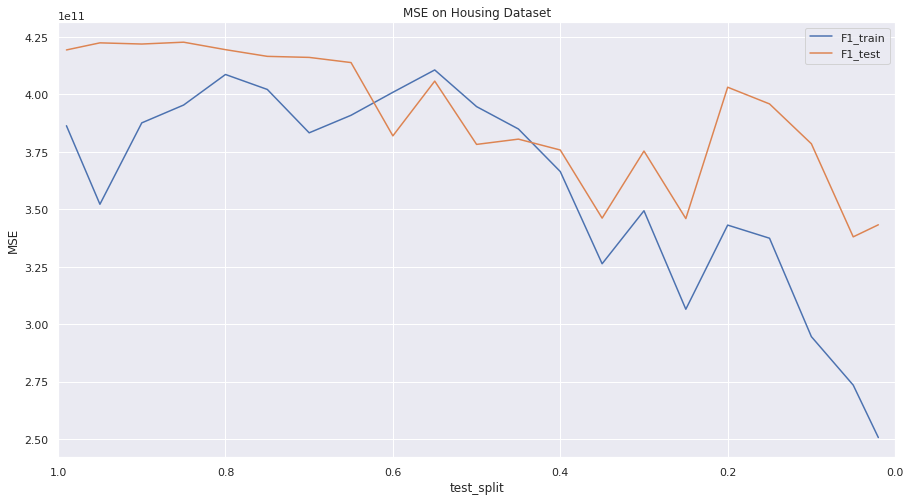

In [ ]:
def learningCurveDT(X,Y, create_model):
  testPercent = np.arange(0.05, 1.0, 0.05)
  testPercent = np.concatenate(( np.asarray([0.02]), testPercent, np.asarray([0.99])))
  # testPercent = [0.85]
  auclist = []
  for test_range in testPercent:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                  test_size=test_range, random_state = 150, shuffle = True)
    model = create_model()
    model.fit(X_train, Y_train, epochs=80, batch_size=64,  verbose=0)
    print(test_range)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val = mean_squared_error(Y_test, y_pred)
    train_auc = mean_squared_error(Y_train, y_train_pred)
    # f1_val, train_auc = get_acc_NN_randomisedCV(X,Y, create_model,test_range)
    auclist.append((f1_val,train_auc))
    # auc = get_acc_NN_randomisedCV(X,Y,model, test_range)
    # auclist.append(auc)
    print((train_auc,f1_val))
  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
    'F1_test':pd.Series(list(zip(*auclist))[0]),
  'test_split':pd.Series(testPercent)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE on Housing Dataset")
  plt.plot('test_split','F1_train', data=d, label='F1_train')
  plt.plot('test_split','F1_test', data=d, label='F1_test')
  plt.xlabel('test_split')
  plt.xlim([1.0,0.0])
  plt.ylabel('MSE')
  plt.legend()
learningCurveDT(X_train, y_train, createModel)

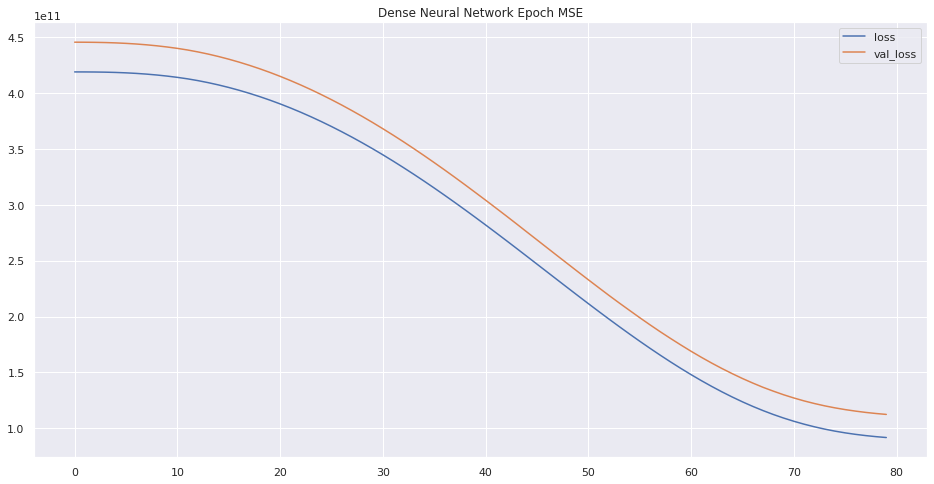

In [ ]:
model = createModel()
# X_train, X_test, Y_train, Y_test = train_test_split(nextRainData,nexRainPredict_encode, \
#                                                   test_size=0.1, random_state=150, shuffle = True)


history = model.fit(X_train,  y_train, epochs= 80, validation_data= (X_test,y_test ))

pd.DataFrame(history.history).plot(figsize= (16,8))
plt.grid(True)
# plt.gca().set_ylim(0,1)
plt.title("Dense Neural Network Epoch MSE")
plt.show()

In [ ]:
#tweak learning rate

  # model.add(Dense(10, activation='relu', input_shape=(13,)))
  # model.add(Dense(10, activation='relu'))
  # model.add(Dense(1))
  # model.compile(optimizer='adam', loss='mean_squared_error')


def neuronsLayer(value, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  model =  Sequential()
  model.add(Dense(value, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(value*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  return model 

(385958395166.804, 395010912991.97705, 10)
(169157578183.8422, 176328345301.65396, 30)
(84452471355.54008, 90153413765.75668, 60)
(82647398749.66725, 88170145727.24364, 80)
(81115707798.16711, 86463779616.1813, 90)
(80589072504.48833, 85855169089.05983, 100)
(77953558643.5462, 83033932003.81517, 120)
(76955172568.0892, 81910014078.25865, 140)
(74282251751.80135, 78929255604.13655, 160)
(74065759513.34805, 78727060113.82603, 180)
(73432167898.04994, 78040785934.06277, 190)
(71509316352.96977, 75944006013.42888, 200)
(71596643448.64008, 75998682605.20761, 210)
(68350568397.72334, 72284991348.05693, 240)
(64656748696.08963, 68324085148.46704, 300)
(60990534665.201935, 64151545875.96341, 400)
sds


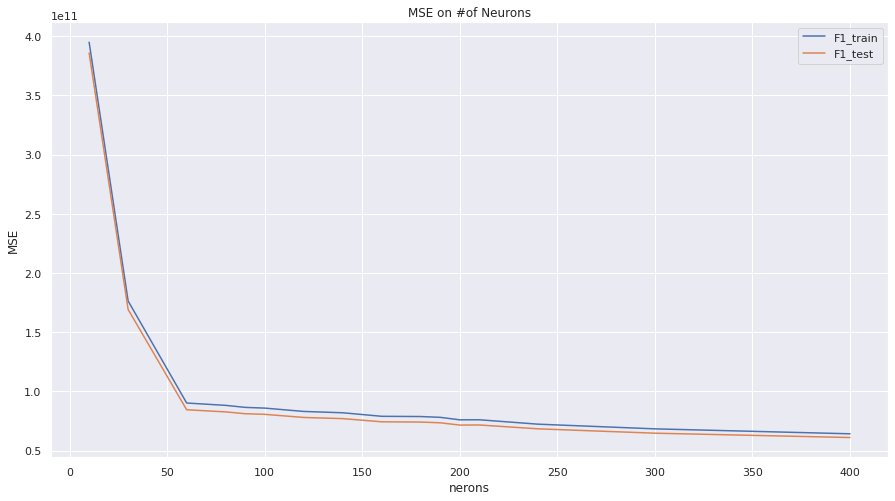

In [ ]:
def neuronGraph(neuronsLayer, X, Y):
  neurons = [10, 30, 60, 80, 90, 100, 120, 140, 160, 180, 190, 200, 210, 240, 300, 400]
  auclist = []
  X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                              test_size=0.4,  shuffle = True)
  for neu in neurons:
    model = neuronsLayer(neu, 13)
    model.fit(X_train, y_train, epochs=80, batch_size=64,  verbose=0)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val_ne = mean_squared_error(y_test, y_pred)
    train_auc_val = mean_squared_error(y_train, y_train_pred)

    auclist.append((f1_val_ne,train_auc_val))
    print((f1_val_ne,train_auc_val, neu))

  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
  'F1_test':pd.Series(list(zip(*auclist))[0]),
  'nerons':pd.Series(neurons)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE on #of Neurons")
  plt.plot('nerons','F1_train', data=d, label='F1_train')
  plt.plot('nerons','F1_test', data=d, label='F1_test')
  plt.xlabel('nerons')
  plt.ylabel('MSE')
  # plt.ylim([0.6,1.1])
  plt.legend()

neuronGraph(neuronsLayer, X_train, y_train)

In [ ]:
#tweak learning rate
def learningRate(learning, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=learning)
  model =  Sequential()
  model.add(Dense(300, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [ ]:
import math

# math.log(10)
learning = 10e-05
learningLst = []
learningLst.append(learning)
for i in range (0,42):
  learning  = 1.2 * learning
  learningLst.append(learning)


(399832913999.1924, 314155637836.68164, 0.0001)
(330794531073.787, 251010253679.12704, 0.00012)
(249800542528.94904, 178377712306.08835, 0.000144)
(179618294935.43918, 118244515210.50388, 0.0001728)
(135845617602.71388, 85930778224.97905, 0.00020736)
(127948178302.22595, 82281547399.10791, 0.000248832)
(122789402297.56752, 79343119636.69165, 0.0002985984)
(118888008985.2372, 77028568829.55077, 0.00035831808)
(113812933535.96906, 74071868179.7375, 0.000429981696)
(108357931603.09515, 70886497812.19733, 0.0005159780352)
(99528577990.59706, 65935692473.84825, 0.00061917364224)
(89051081539.31107, 60528215023.315285, 0.000743008370688)
(82571864849.75067, 57162767222.97903, 0.0008916100448256)
(76365221654.98619, 54072454391.0731, 0.00106993205379072)
(71409348244.70071, 51459040068.985245, 0.0012839184645488638)
(69161681781.31366, 50133056830.694435, 0.0015407021574586365)
(65412282719.55129, 47497171703.25834, 0.0018488425889503638)
(63844915779.34751, 46505649765.59154, 0.0022186111067

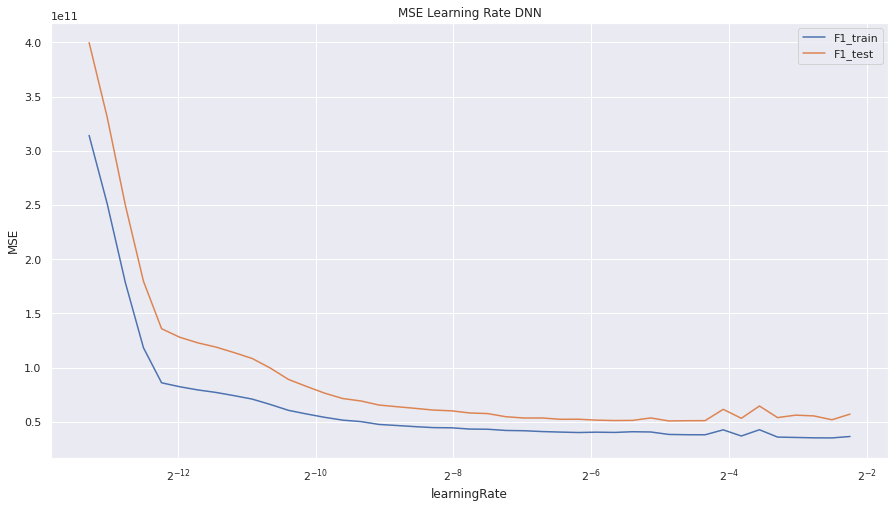

In [ ]:

def findLearning(learningLst, learningRate, X, Y, input ):
  auclist = []
  X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                              test_size=0.1,  random_state=150, shuffle = True)
  for learn in learningLst:
    model = learningRate(learn, input)
    model.fit(X_train, y_train, epochs=80, batch_size=64,  verbose=0)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val_ne = mean_squared_error(y_test, y_pred)
    train_auc_val = mean_squared_error(y_train, y_train_pred)
    auclist.append((f1_val_ne,train_auc_val))
    print((f1_val_ne,train_auc_val, learn))

  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
  'F1_test':pd.Series(list(zip(*auclist))[0]),
  'learningRate':pd.Series(learningLst)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE Learning Rate DNN")
  plt.plot('learningRate','F1_train', data=d, label='F1_train')
  plt.plot('learningRate','F1_test', data=d, label='F1_test')
  plt.xlabel('learningRate')
  plt.ylabel('MSE')
  plt.xscale('log', basex=2)
  # plt.xlim([10e-05, 1.1])
  # plt.ylim([0.6,1.1])
  plt.legend()
  return d

d = findLearning(learningLst, learningRate, X_train, y_train, 13 )

In [ ]:
#tweak learning rate
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.009539621664406897)
  model =  Sequential()
  model.add(Dense(300, input_dim=13, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

0.02
(41173526230.362465, 79101860162.61346)
0.05
(41078123535.28131, 55895606503.29631)
0.1
(40815999557.76727, 53145260293.4273)
0.15000000000000002
(40334403230.93889, 52862994755.11985)
0.2
(39899814971.845604, 53000765917.59865)
0.25
(40771862209.17329, 50838407860.825165)
0.3
(40900318761.96058, 47205060462.386505)
0.35000000000000003
(41733051454.418015, 46543038437.35545)
0.4
(42192225443.35268, 46223309192.22201)
0.45
(43753017162.30894, 44920862683.69441)
0.5
(44670951851.86165, 45458248865.13993)
0.55
(43464825792.522285, 45895728158.64622)
0.6000000000000001
(45509398458.13652, 45801223463.500694)
0.6500000000000001
(40843901686.68749, 49790926216.400505)
0.7000000000000001
(40853442584.85617, 50331438787.31973)
0.7500000000000001
(43696217376.093445, 49483472285.3047)
0.8
(45066338118.75325, 51452968134.07254)
0.8500000000000001
(47023725198.647095, 54615421778.74838)
0.9000000000000001
(49638875527.5512, 61221762792.00058)
0.9500000000000001
(55377458333.1941, 81338869942

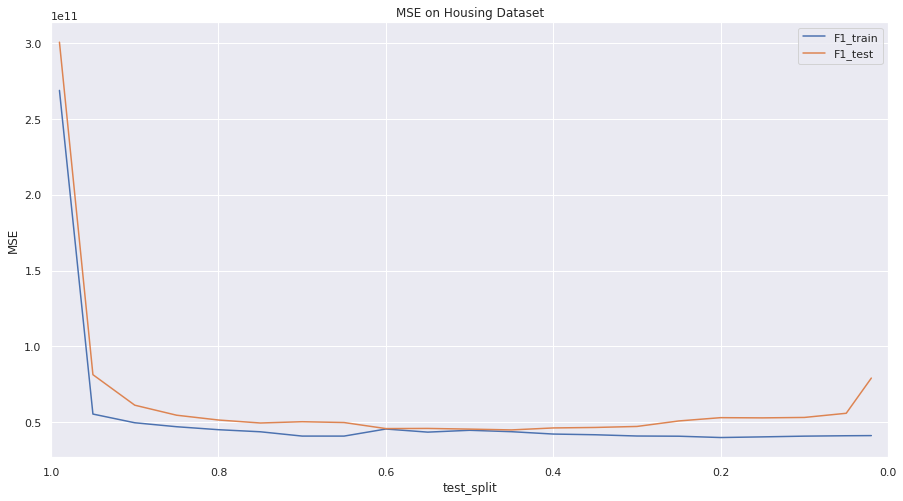

In [ ]:
learningCurveDT(X_train, y_train, finalmodel)

## Randomized Hill cimbing

In [ ]:
# X_train, X_test, y_train, y_test

In [ ]:
def RH_restarts( X_train,  y_train, X_test, y_test):
  restarts = [0,5,10,20]
  mod = []
  for r in restarts:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [300,200], activation = 'relu', \
                                    algorithm = 'random_hill_climb', \
                                    bias = True, is_classifier = False, learning_rate = 0.009539621664406897, \
                                    early_stopping = True, max_attempts = 100, curve= True, random_state = 7641, max_iters = 5000, restarts = r)
    start = time.time()
    nn_model1.fit(X_train, y_train)
    end = time.time()
    y_test_pred = nn_model1.predict(X_test)
    f1_val = mean_squared_error(y_test, y_test_pred)
    y_train_val = mean_squared_error(y_train, nn_model1.predict(X_train))
    mod.append((r, nn_model1, end-start, f1_val, y_train_val))
    print(r)
  return mod
total = RH_restarts( X_train,  y_train, X_test, y_test)


0
5
10
20


In [ ]:
total

In [ ]:
def itereConve(total, title):
  data = pd.DataFrame()
  max_size = 0
  for val in total:
    if val[1].fitness_curve.size > max_size:
      max_size = val[1].fitness_curve.size
  print(max_size, "max")
  converg = pd.DataFrame()
  for val in total:
    sz = val[1].fitness_curve.size
    if sz<max_size:
      diff = max_size - sz
      fit = [min(val[1].fitness_curve)] * diff
      end = np.append(val[1].fitness_curve, fit)
      converg[val[0]] = end
    else:
      converg[val[0]] = val[1].fitness_curve
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=converg, linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("Iterations")
  plt.ylabel("MSE")
  plt.show()


5000 max


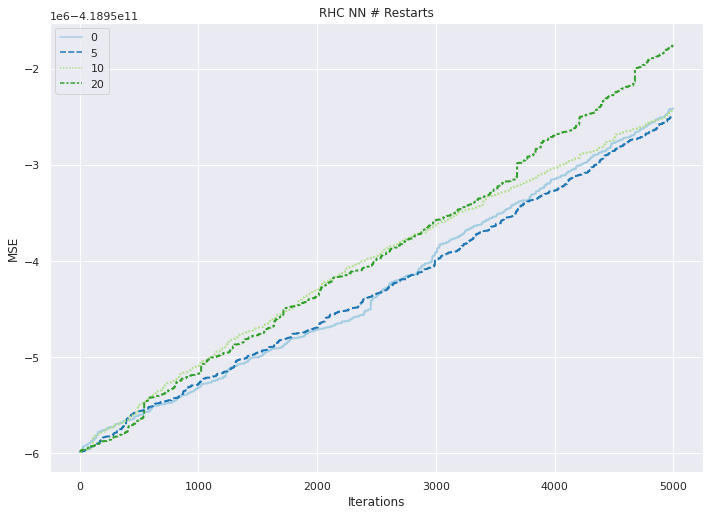

In [ ]:
itereConve(total, "RHC NN # Restarts")

In [ ]:
def clocktime(total, title):
  r = []
  clock = []
  for x in total:
    r.append(x[0])
    clock.append(x[2])
  cl = pd.DataFrame()
  cl['ClockTS'] = clock 
  cl['Restarts'] = r 
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=cl, x = 'Restarts', y = 'ClockTS', linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("#Restarts")
  plt.ylabel("Clock TS")
  plt.show()
# clocktime(total, "RHC Clock TS Restarts")

In [ ]:
def modelComplexity(total, title):
  r = []
  test = []
  train = []
  for x in total:
    r.append(x[0])
    test.append(x[3])
    train.append(x[4])
  cl = pd.DataFrame()
  cl['train'] = train
  cl['test'] = test
  cl['Restarts'] = r 
  plt.figure(figsize=(15,8))
  plt.title(title)
  plt.plot('Restarts', 'train', data=cl, label='train')
  plt.plot('Restarts', 'test', data=cl, label='test')
  plt.xlabel('Restarts')
  plt.ylabel('MSE')
  plt.legend()
# modelComplexity(total, "RHC test/valid score #Restarts")

In [ ]:
total

[(0, NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_iters=5000,
                mutation_prob=0.1, pop_size=200, restarts=0,
                schedule=<mlrose.decay.GeomDecay object at 0x7fe043140810>), 622.4637546539307, 445566142943.2177, 418952412271.09705),
 (5, NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_iters=5000,
                mutation_prob=0.1, pop_size=200, restarts=5,
                schedule=<mlrose.decay.GeomDecay object at 0x7fe043140810>), 3736.2485370635986, 445565826170.59814, 418952098628.97815),
 (10, NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_

## Genetic Alg

In [ ]:
def GA_prob( X_train,  y_train, X_test, y_test):
  prob = [0.05, 0.1, 0.2, 0.3, 0.4]
  mod = []
  for r in prob:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [300,200], activation = 'relu', \
                                    algorithm = 'genetic_alg', \
                                    bias = True, is_classifier = False, learning_rate = 0.009539621664406897, \
                                    early_stopping = True, max_attempts = 100, curve= True, random_state = 7641, max_iters = 10000, mutation_prob  = r)
    start = time.time()
    nn_model1.fit(X_train, y_train)
    end = time.time()
    y_test_pred = nn_model1.predict(X_test)
    f1_val = mean_squared_error(y_test, y_test_pred)
    y_train_val = mean_squared_error(y_train, nn_model1.predict(X_train))
    mod.append((r, nn_model1, end-start, f1_val, y_train_val))
    print(r)
  return mod
total = GA_prob( X_train,  y_train, X_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
itereConve(total, "GA NN Mutation Prob")

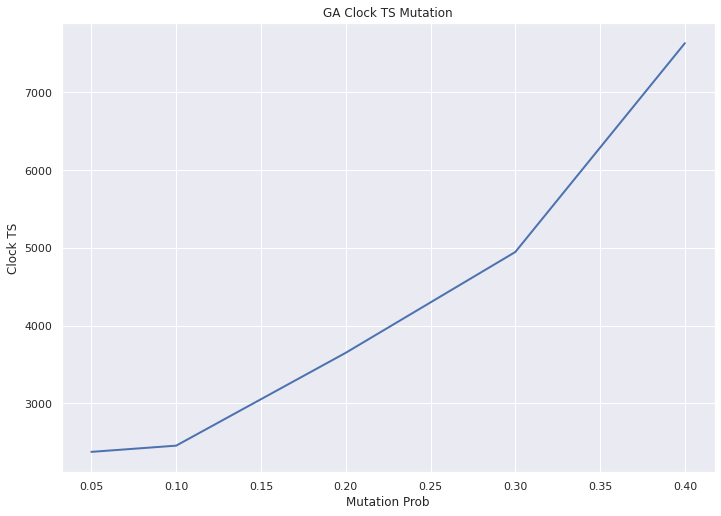

In [ ]:
def clocktime(total, title):
  r = []
  clock = []
  for x in total:
    r.append(x[0])
    clock.append(x[2])
  cl = pd.DataFrame()
  cl['ClockTS'] = clock 
  cl['Mutation_prob'] = r 
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=cl, x = 'Mutation_prob', y = 'ClockTS', linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("Mutation Prob")
  plt.ylabel("Clock TS")
  plt.show()
clocktime(total, "GA Clock TS Mutation")

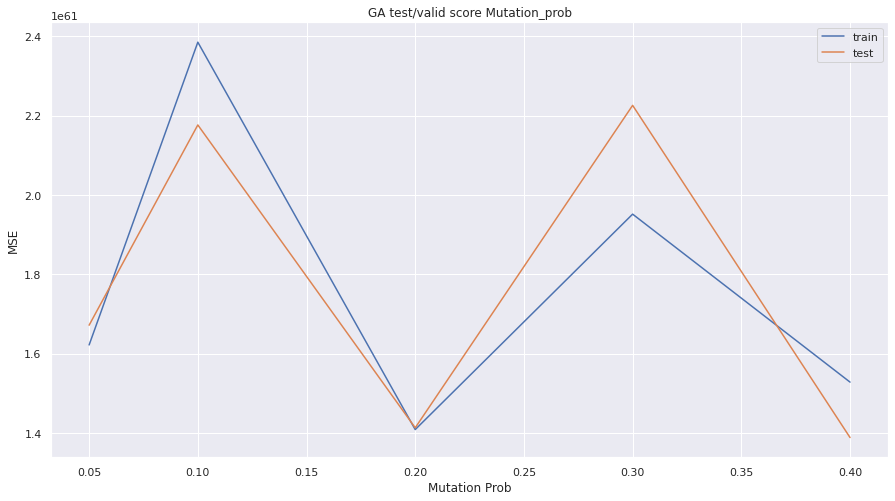

In [ ]:
def modelComplexity(total, title):
  r = []
  test = []
  train = []
  for x in total:
    r.append(x[0])
    test.append(x[3])
    train.append(x[4])
  cl = pd.DataFrame()
  cl['train'] = train
  cl['test'] = test
  cl['Mutation_prob'] = r 
  plt.figure(figsize=(15,8))
  plt.title(title)
  plt.plot('Mutation_prob', 'train', data=cl, label='train')
  plt.plot('Mutation_prob', 'test', data=cl, label='test')
  plt.xlabel('Mutation Prob')
  plt.ylabel('MSE')
  plt.legend()
modelComplexity(total, "GA test/valid score Mutation_prob")

In [ ]:
def GA_prob( X_train,  y_train, X_test, y_test):
  prob = [200, 300, 400, 700]
  mod = []
  for r in prob:
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [300,200], activation = 'relu', \
                                    algorithm = 'genetic_alg', \
                                    bias = True, is_classifier = False, learning_rate = 0.009539621664406897, \
                                    early_stopping = True, max_attempts = 100, curve= True, random_state = 7641, max_iters = 10000, mutation_prob  = 0.2, pop_size = r)
    start = time.time()
    nn_model1.fit(X_train, y_train)
    end = time.time()
    y_test_pred = nn_model1.predict(X_test)
    f1_val = mean_squared_error(y_test, y_test_pred)
    y_train_val = mean_squared_error(y_train, nn_model1.predict(X_train))
    mod.append((r, nn_model1, end-start, f1_val, y_train_val))
    print(r)
  return mod
total = GA_prob( X_train,  y_train, X_test, y_test)

200
300
400
700


In [ ]:
total

[(200, NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_iters=10000,
                mutation_prob=0.2, pop_size=200, restarts=0,
                schedule=<mlrose.decay.GeomDecay object at 0x7fb4ef190f50>), 3234.6307129859924, 1.4132565989075839e+61, 1.4087934958314484e+61),
 (300, NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_iters=10000,
                mutation_prob=0.2, pop_size=300, restarts=0,
                schedule=<mlrose.decay.GeomDecay object at 0x7fb4ef190f50>), 5715.862089395523, 1.6692146418512953e+61, 1.7923277238561173e+61),
 (400, NeuralNetwork(bias=True, clip_max=10000000000.0, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.

230 max


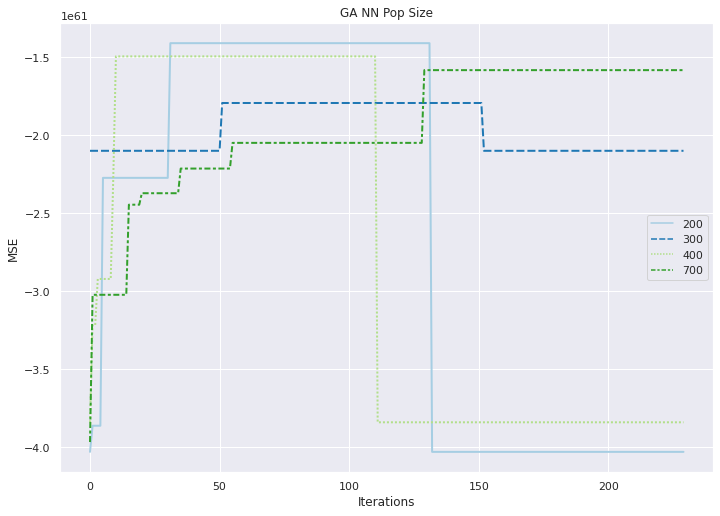

In [ ]:
itereConve(total, "GA NN Pop Size")

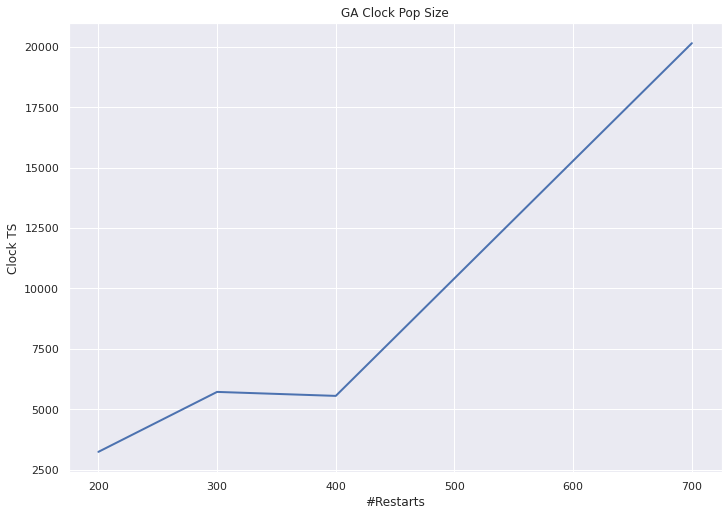

In [ ]:
clocktime(total, "GA Clock Pop Size")

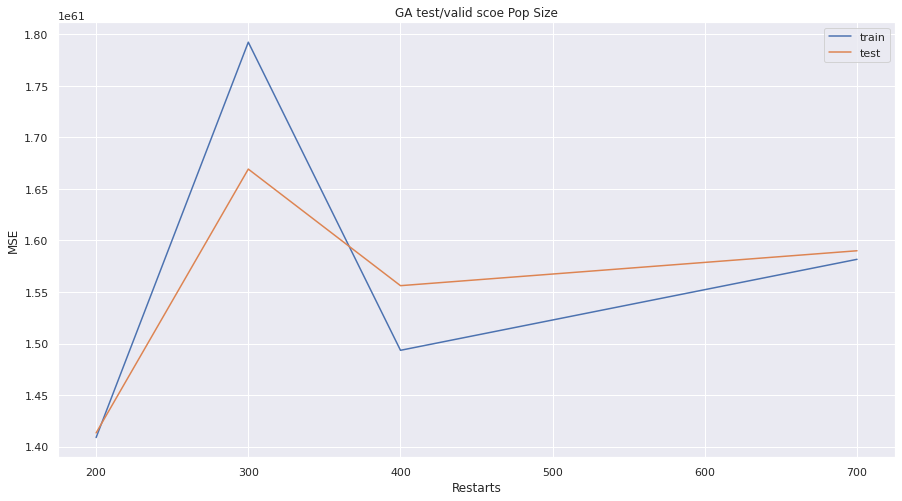

In [ ]:
modelComplexity(total, "GA test/valid scoe Pop Size")

## Simulated Annealing

In [ ]:
def SA_exp( X_train,  y_train, X_test, y_test):
  restarts = [0,5,10,20]
  schedule = [('exp_dec-1', mlrose.ExpDecay(init_temp=1)), ('exp_dec-3', mlrose.ExpDecay( init_temp=3)),
              ('geom_dec-0.99', mlrose.GeomDecay(init_temp= 1)), ('geom_dec-0.95', mlrose.GeomDecay(init_temp=3)),
              ('arith_dec-0.0001', mlrose.ArithDecay(init_temp=1)),  ('arith_dec-0.001', mlrose.ArithDecay(init_temp=3))] 
  mod = []
  for r in schedule:
    val, scd = r
    nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [300,200], activation = 'relu', \
                                    algorithm = 'simulated_annealing', \
                                    bias = True, is_classifier = False, learning_rate = 0.009539621664406897, \
                                    early_stopping = True, max_attempts = 100, curve= True, clip_max = 10, random_state = 7641, max_iters = 30000, schedule =scd )
    start = time.time()
    nn_model1.fit(X_train, y_train)
    end = time.time()
    y_test_pred = nn_model1.predict(X_test)
    f1_val = mean_squared_error(y_test, y_test_pred)
    y_train_val = mean_squared_error(y_train, nn_model1.predict(X_train))
    mod.append((r, nn_model1, end-start, f1_val, y_train_val))
    print(f1_val, y_train_val, end-start, val )
  return mod
total = SA_exp( X_train,  y_train, X_test, y_test)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob

445547891561.99713 418934249896.6386 4405.084039926529 exp_dec-1


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob

445547891565.23236 418934249902.1509 4407.564083576202 exp_dec-3


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob

445547891553.61725 418934249894.5513 4463.003748893738 geom_dec-0.99


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob

445547891558.5566 418934249898.3122 4503.61671090126 geom_dec-0.95


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob

445547891672.9144 418934249975.364 4517.022138595581 arith_dec-0.0001


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
/usr/local/lib/python3.7/dist-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob

445547892617.30585 418934250479.94324 4470.088835000992 arith_dec-0.001


In [ ]:
total

[(('exp_dec-1', <mlrose.decay.ExpDecay at 0x7fda4fc0b590>),
  NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_iters=30000,
                mutation_prob=0.1, pop_size=200, restarts=0,
                schedule=<mlrose.decay.ExpDecay object at 0x7fda4fc0b590>),
  4405.084039926529,
  445547891561.99713,
  418934249896.6386),
 (('exp_dec-3', <mlrose.decay.ExpDecay at 0x7fda4fc0b610>),
  NeuralNetwork(bias=True, clip_max=10, early_stopping=True,
                hidden_nodes=[300, 200], is_classifier=False,
                learning_rate=0.009539621664406897, max_iters=30000,
                mutation_prob=0.1, pop_size=200, restarts=0,
                schedule=<mlrose.decay.ExpDecay object at 0x7fda4fc0b610>),
  4407.564083576202,
  445547891565.23236,
  418934249902.1509),
 (('geom_dec-0.99', <mlrose.decay.GeomDecay at 0x7fda4fc0b690>),
  NeuralNetwork(bias=True, 

30000 max


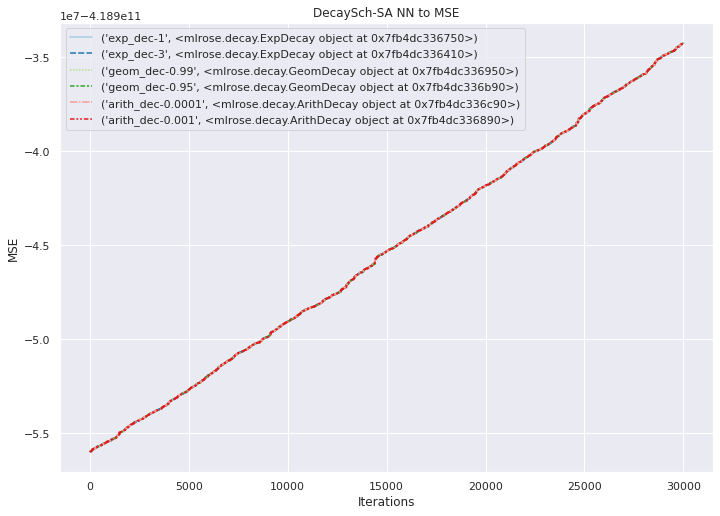

In [ ]:
def itereConve(total, title):
  data = pd.DataFrame()
  max_size = 0
  for val in total:
    if val[1].fitness_curve.size > max_size:
      max_size = val[1].fitness_curve.size
  print(max_size, "max")
  converg = pd.DataFrame()
  for val in total:
    sz = val[1].fitness_curve.size
    if sz<max_size:
      diff = max_size - sz
      fit = [min(val[1].fitness_curve)] * diff
      end = np.append(val[1].fitness_curve, fit)
      converg[val[0]] = end
    else:
      converg[val[0]] = val[1].fitness_curve
  sn.set(rc={'figure.figsize':(11.7,8.27)})
  sn.set_style("darkgrid")
  sn.lineplot(data=converg, linewidth = 2, palette= "Paired")
  plt.title(title)
  plt.xlabel("Iterations")
  plt.ylabel("MSE")
  plt.show()
itereConve(total, "Inital Temp-SA NN to MSE")

In [ ]:
aa = pd.DataFrame()

In [ ]:
aa['value'] = nn_model1.fitness_curve

In [ ]:
aa['Iterations'] = range(0,10000,1)

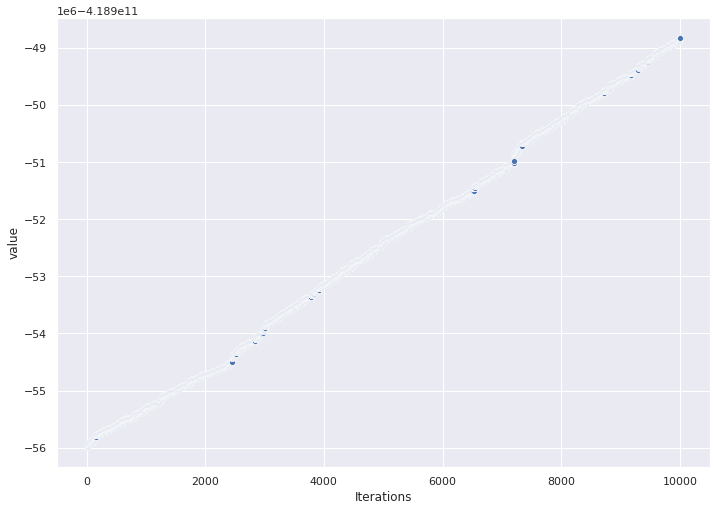

In [ ]:
sn.lineplot(data=aa, x = 'Iterations', y="value",  marker="o", palette="Paired", markers = True, linewidth = 2)